Author: Autumn Salsberry

Contact: linkedin.com/in/salsbeas

BrainStation Capstone: Predicting Adoptability of Shelter Dogs

August 8, 2022

This notebook is for comparing the two target variable splits on Logistic Regression Models using the Statmodels package. Because this is a very iterative process, I will clearly walk through the first model fitting for each target split and then evaluate the model when the independent variables all meet the thresholds I will set. For this reason, there will be fewer markdown cells in this notebook. 

# Table of Contents

* [Adopted vs Everything Else](#else)
    * [Logistic Models](#logreg)
        * [Model 5](#5)
        * [Model 10](#10)
        * [Model 15](#15)
    * [Model Evaluation](#eval)
* [Adopted or Moved to Partner/Euthanized](#partner)
    * [Logistic Model (Adopted or Moved to Partner/Euthanized)](#logic) 
        * [Model E](#e)
        * [Model J](#j)
        * [Model O](#o)
        * [Model T](#t)
    * [Model Evaluation](#neweval)
* [Comparing the Target Splits](#compare)

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn
from numpy.random import seed

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import norm
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Goals

* Compare two different target variable splits and determine which I should use moving forward
* Determine which independent variables have the most effect on adoptability of a dog
    * Fit a Logistic Regression model on both target variable splits that has all statistically significant coefficients

# Adopted vs. Everything Else
<a class="anchor" id="else"></a>

This section will only use the target variable that was split in such a way that dogs that were adopted were labeled 1 and dogs that had any other outcome were labeled 0. 

In [2]:
#read in the data
modeling_df1 = pd.read_csv('Tabular Data/num_Austin_Shelter_Dog.csv')

In [3]:
#drop the key
modeling_df1.drop('Animal ID', axis=1, inplace=True)
modeling_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29883 entries, 0 to 29882
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   stray                  29883 non-null  int64  
 1   normal_intake          29883 non-null  int64  
 2   age_in_months_intake   29883 non-null  float64
 3   adopted                29883 non-null  int64  
 4   age_in_months_outcome  29883 non-null  float64
 5   sex                    29883 non-null  int64  
 6   fixed_intake           29883 non-null  int64  
 7   fixed_changed          29883 non-null  int64  
 8   retriever              29883 non-null  int64  
 9   shepherd               29883 non-null  int64  
 10  beagle                 29883 non-null  int64  
 11  terrier                29883 non-null  int64  
 12  boxer                  29883 non-null  int64  
 13  poodle                 29883 non-null  int64  
 14  rottweiler             29883 non-null  int64  
 15  da

## Logistic Regression Model (adopted vs all other outcomes)
<a class="anchor" id="logreg"></a>

Now that I have the data read in, I am ready to start fitting it to the logistic regression model and checking if each independent variable's coefficient is statistically significant or not by evaluating their p-values. I will set the threshold at 0.05 meaning that coefficients with a p-value above 0.05 are not considered statistically significant and should not be included in the final model. Before starting this process I will first check if any of the columns are highly correlated. For columns that are strongly correlated, I will determine which to drop. This is because having two columns that are strongly correlated implies that they both contribute similar predictive power of the outcome and thus only one of them is needed. 

### Model 1

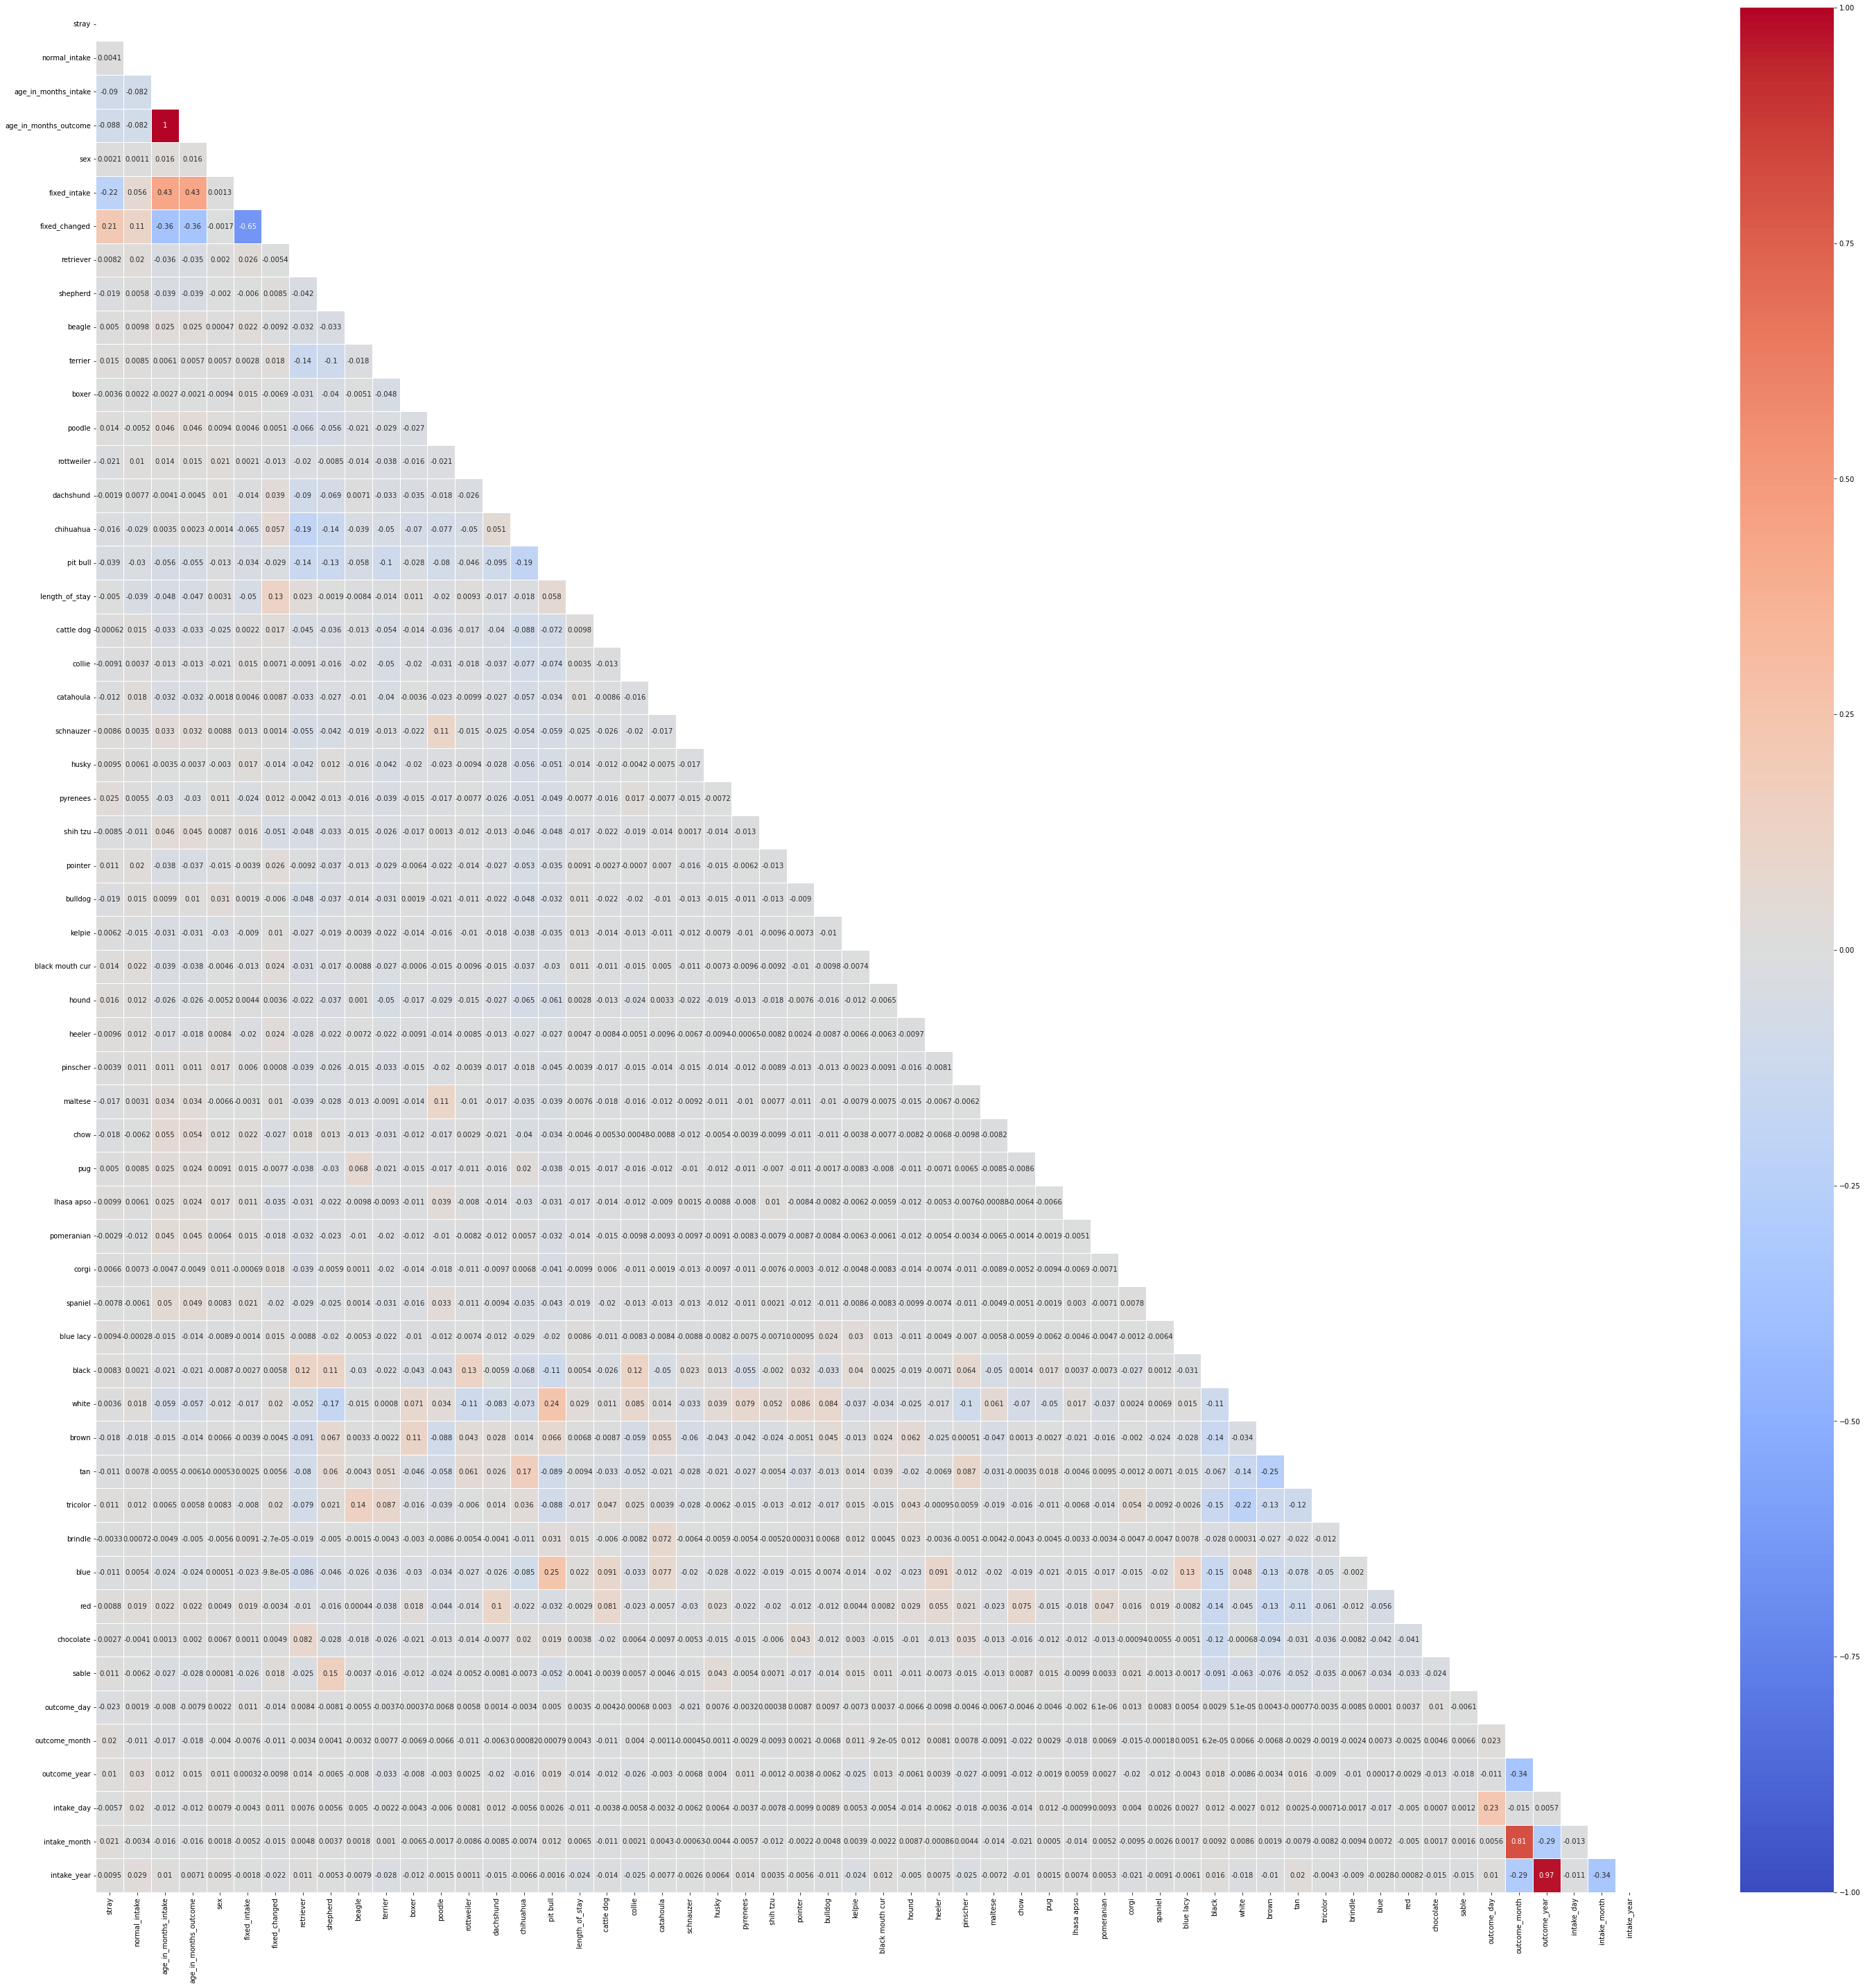

In [4]:
#set the independent variables to be checked for colinearity
X = modeling_df1.drop('adopted', axis=1)

X_corr = X.corr()
mask = np.triu(X_corr)

# 1. Check the correlations in this data set. Can't have any multicollinearity 
plt.figure(figsize=(50,50))
sns.heatmap(X.corr(), cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True, lw=1, mask = mask)
plt.show()

There are a few highly correlated columns. Age on intake and age on outcome are 1:1 correlated and intake date and outcome date are highly correlated too. I will remove the outcome date because I already have a column that says how long they were at the shelter, so this information can be calulated if needed in the future. I also will removed the fixed changed column because it is highly correlated with the fixed on intake column. Most shelters will not adopt a dog out unless it is already spayed or neutered, so this information is not extremely important for this projects purpose. 

In [5]:
#drop the highy correlated columns
modeling_df1.drop(['age_in_months_outcome', 'fixed_changed', 'outcome_year', 'outcome_month', 'outcome_day'], axis=1, inplace=True)

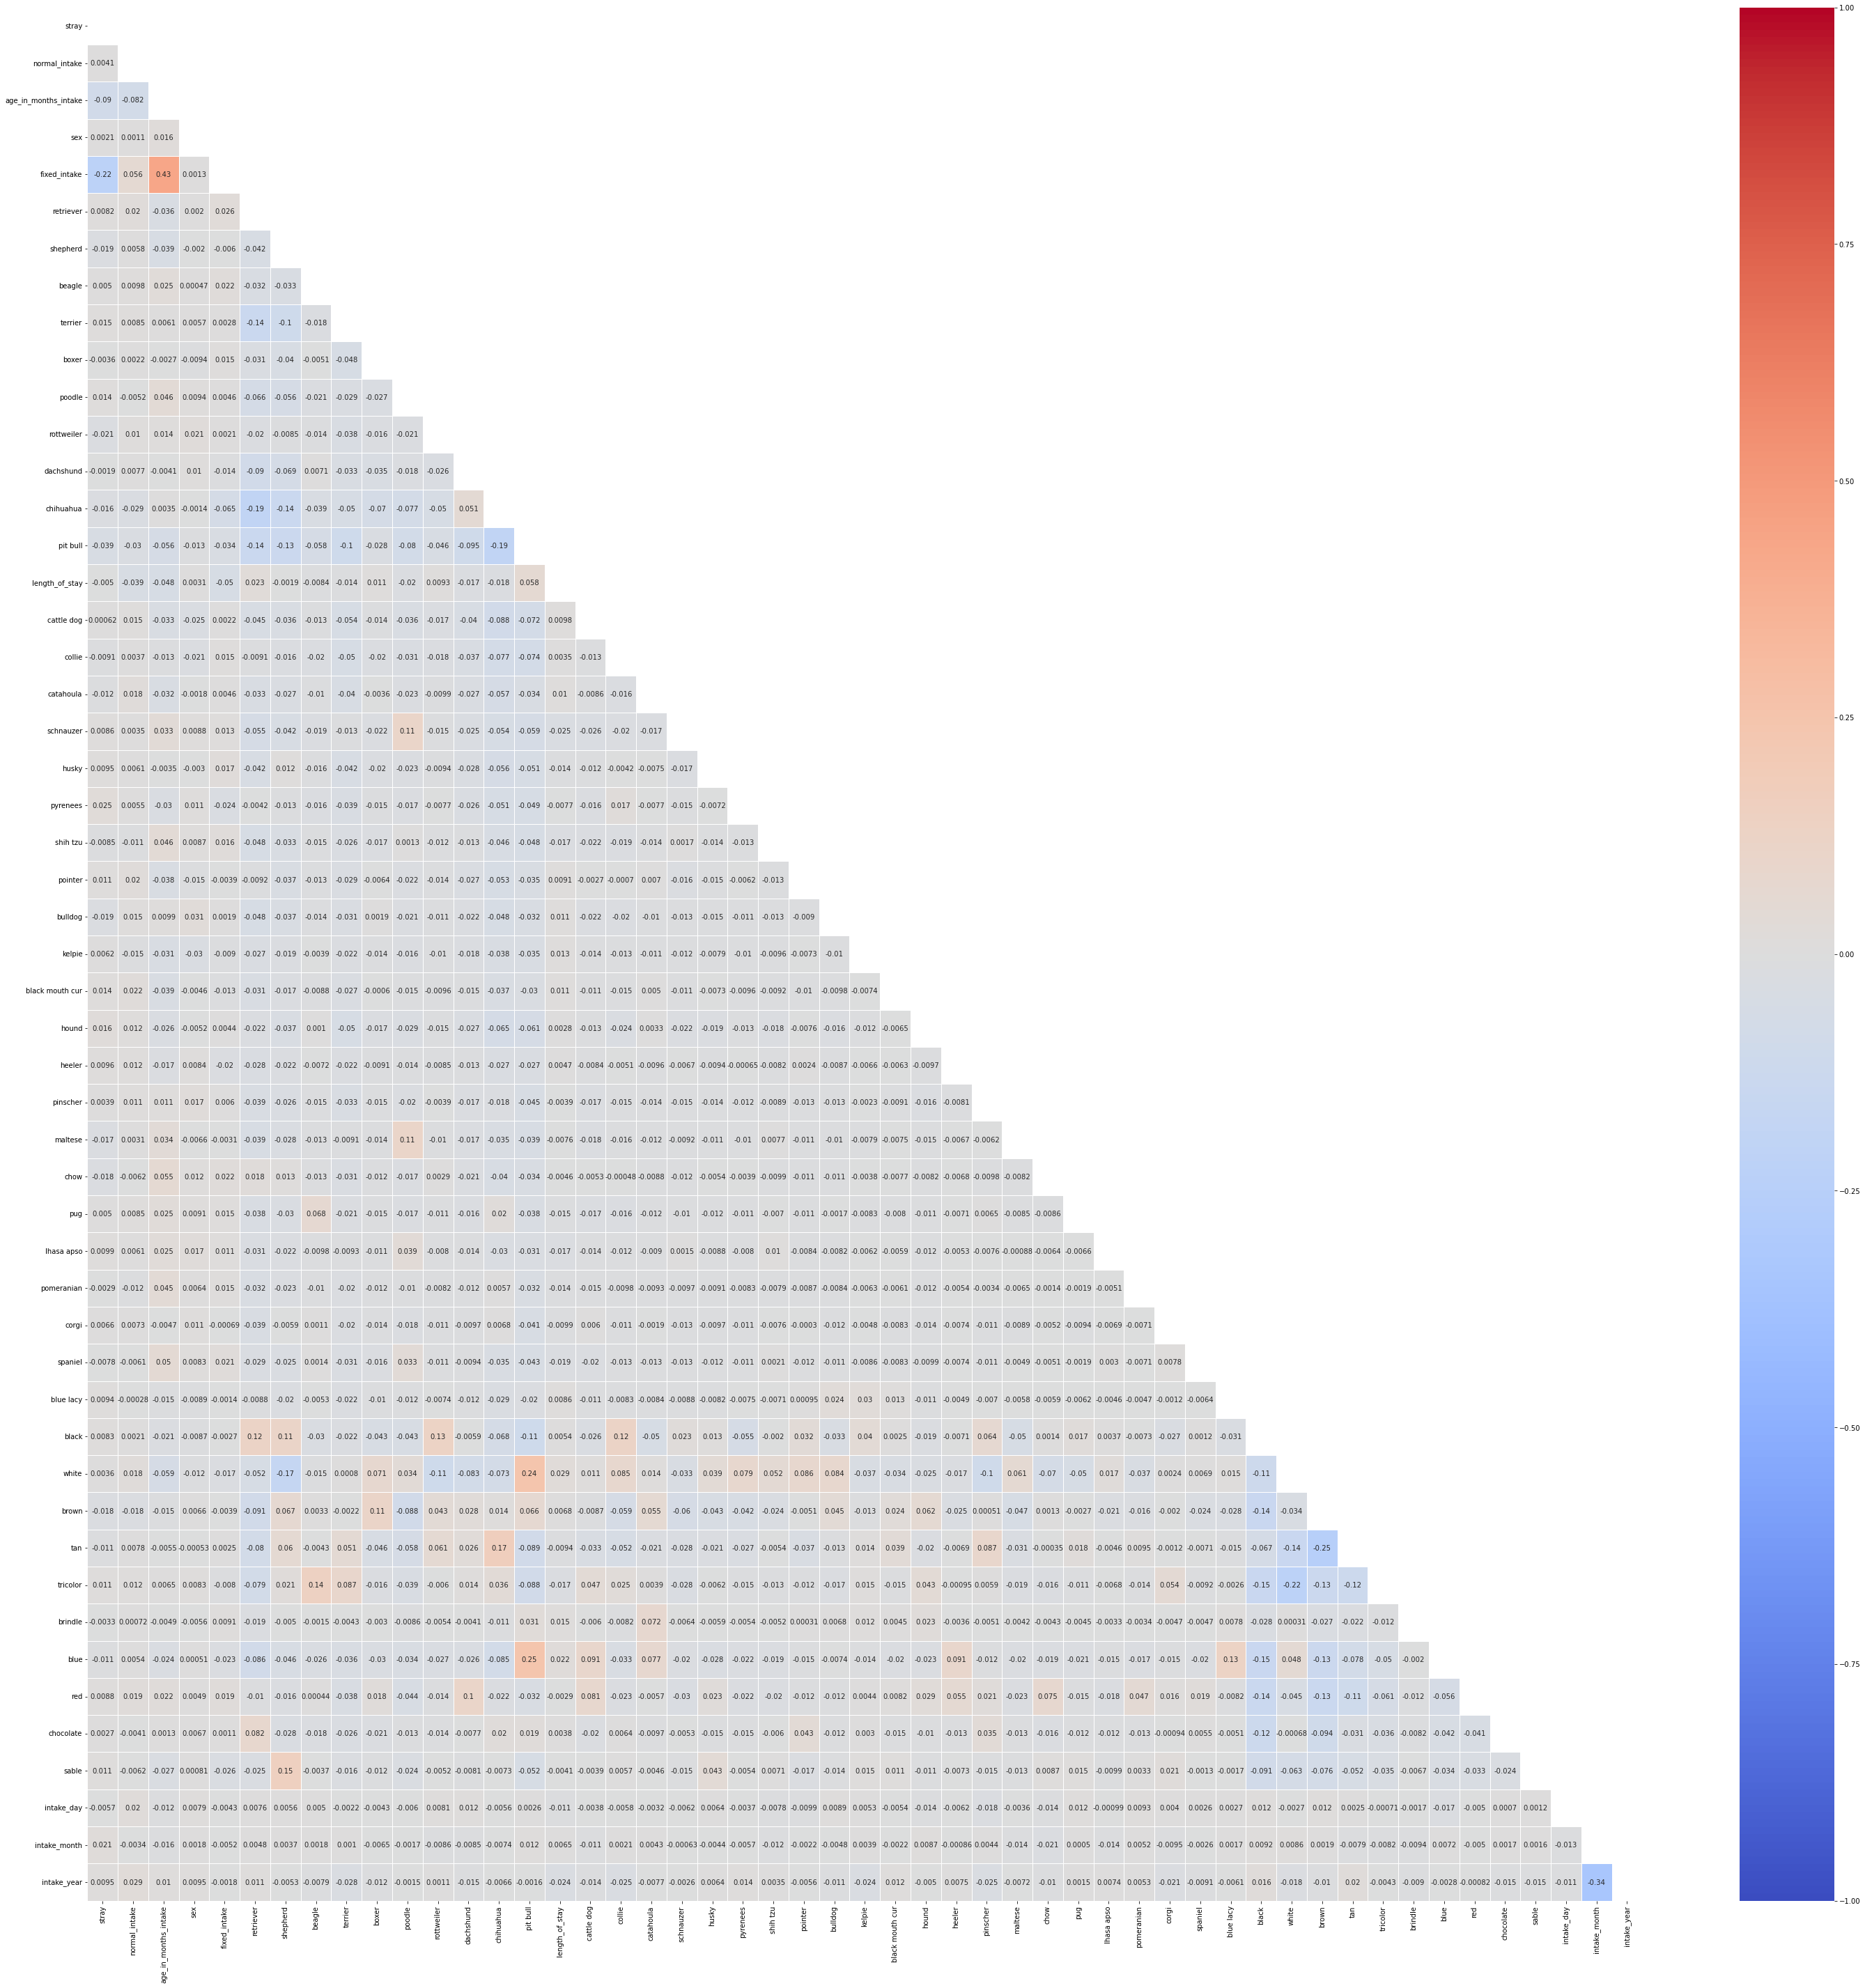

In [6]:
#run it again to make sure no other variables are highly correlated
X = modeling_df1.drop('adopted', axis=1)

X_corr = X.corr()
mask = np.triu(X_corr)

# 1. Check the correlations in this data set. Can't have any multicollinearity 
plt.figure(figsize=(50,50))
sns.heatmap(X.corr(), cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True, lw=1, mask = mask)
plt.show()

Nothing elseis strongly correlated and there is not a strong indicator of multicolinearity, so I will start with a logistic regression model where adopted is the target variable and all other columns are the independent variables. 

In [7]:
# Define our X and y
X = modeling_df1.drop('adopted', axis=1)
y = modeling_df1['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [8]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt1= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results1 = mylogreg_adopt1.fit()

# Look at summary
mylogreg_adopt_results1.summary()

Optimization terminated successfully.
         Current function value: 0.618878
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29831
Method:                           MLE   Df Model:                           51
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09855
Time:                        12:51:39   Log-Likelihood:                -18494.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8399      0.409      6.941      0.000       2.038       3.642
stray                    0.2783      0.030      9.297      0.000       0.220       0.337
normal_intake            0.7724      0.047     16.451      0.000       0.680       0.864
age_in_months_intake    -0.0119      0.000    -26.558      0.000      -0.013      -0.011
sex                     -0.1890      0.025     -7.547      0.000      -0.238      -0.140
fixed_intake            -0.4537      0.031    -14.722      0.000      -0.514      -0.393
retriever                0.1985      0.043      4.656      0.000       0.115       0.282
shepherd                 0.1828      0.052      3.522      0.000       0.081       0.284
beagle                   0.3206      0.093      3.430      0.001       0.137       0.504
terrier                  0.2084      0.048      4.385      0.000       0.115       0.301
boxer                    0.1519      0.084      1.810      0.070      -0.013       0.316
poodle                   0.2967      0.077      3.858      0.000       0.146       0.447
rottweiler              -0.1431      0.117     -1.225      0.221      -0.372       0.086
dachshund                0.4057      0.061      6.607      0.000       0.285       0.526
chihuahua                0.2160      0.044      4.947      0.000       0.130       0.302
pit bull                -0.4303      0.047     -9.169      0.000      -0.522      -0.338
length_of_stay           0.0154      0.001     25.969      0.000       0.014       0.017
cattle dog               0.3550      0.068      5.184      0.000       0.221       0.489
collie                   0.2815      0.078      3.607      0.000       0.129       0.435
catahoula                0.3104      0.101      3.062      0.002       0.112       0.509
schnauzer                0.3006      0.098      3.056      0.002       0.108       0.493
husky                   -0.1441      0.105     -1.376      0.169      -0.349       0.061
pyrenees                 0.0591      0.111      0.531      0.595      -0.159       0.277
shih tzu                -1.2046      0.155     -7.787      0.000      -1.508      -0.901
pointer                  0.3456      0.108      3.200      0.001       0.134       0.557
bulldog                 -0.2779      0.115     -2.424      0.015      -0.503      -0.053
kelpie                   0.4729      0.145      3.264      0.001       0.189       0.757
black mouth cur          0.3640      0.150      2.430      0.015       0.070       0.658
hound                    0.1318      0.080      1.648      0.099      -0.025       0.289
heeler                   0.4726      0.169      2.796      0.005       0.141       0.804
pinscher                 0.2914      0.119      2.441      0.015       0.057       0.525
maltese                  0.3384      0.144      2.358      0.018       0.057       0.620
chow                    -0.1091      0.149     -0.733      0.463      -0.401       0.183
pug                     -0.1525      

Some of the p values for the coefficience do not meet the 0.05 threshold, so I will remove the independent variable with the highest p-value and refit the model. This is likely going to take several iterations. I will have a complete model when all coefficient's have a p-value under the 0.05 threshold. At that point I will evaluate the model and analyze the valuable coefficients that predict adoptability of a dog. 

In [9]:
#which variable should be dropped?
mylogreg_adopt_results1.pvalues.max()
#chow is associated with this p-value

0.661825341227205

### Model 2

In [10]:
modeling_df2 = modeling_df1.copy()

In [11]:
modeling_df2.drop('chow', axis=1, inplace=True)

In [12]:
# Define our X and y
X = modeling_df2.drop('adopted', axis=1)
y = modeling_df2['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [13]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt2= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results2 = mylogreg_adopt2.fit()

# Look at summary
mylogreg_adopt_results2.summary()

Optimization terminated successfully.
         Current function value: 0.618887
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29832
Method:                           MLE   Df Model:                           50
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09853
Time:                        12:51:40   Log-Likelihood:                -18494.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8447      0.409      6.954      0.000       2.043       3.646
stray                    0.2788      0.030      9.314      0.000       0.220       0.337
normal_intake            0.7721      0.047     16.446      0.000       0.680       0.864
age_in_months_intake    -0.0119      0.000    -26.590      0.000      -0.013      -0.011
sex                     -0.1893      0.025     -7.558      0.000      -0.238      -0.140
fixed_intake            -0.4535      0.031    -14.717      0.000      -0.514      -0.393
retriever                0.2003      0.043      4.706      0.000       0.117       0.284
shepherd                 0.1849      0.052      3.569      0.000       0.083       0.286
beagle                   0.3230      0.093      3.457      0.001       0.140       0.506
terrier                  0.2111      0.047      4.456      0.000       0.118       0.304
boxer                    0.1546      0.084      1.844      0.065      -0.010       0.319
poodle                   0.2993      0.077      3.896      0.000       0.149       0.450
rottweiler              -0.1400      0.117     -1.199      0.230      -0.369       0.089
dachshund                0.4086      0.061      6.668      0.000       0.289       0.529
chihuahua                0.2192      0.043      5.044      0.000       0.134       0.304
pit bull                -0.4276      0.047     -9.140      0.000      -0.519      -0.336
length_of_stay           0.0154      0.001     25.971      0.000       0.014       0.017
cattle dog               0.3573      0.068      5.224      0.000       0.223       0.491
collie                   0.2831      0.078      3.629      0.000       0.130       0.436
catahoula                0.3128      0.101      3.088      0.002       0.114       0.511
schnauzer                0.3035      0.098      3.087      0.002       0.111       0.496
husky                   -0.1416      0.105     -1.353      0.176      -0.347       0.064
pyrenees                 0.0609      0.111      0.548      0.584      -0.157       0.279
shih tzu                -1.2018      0.155     -7.771      0.000      -1.505      -0.899
pointer                  0.3478      0.108      3.221      0.001       0.136       0.559
bulldog                 -0.2751      0.115     -2.401      0.016      -0.500      -0.051
kelpie                   0.4757      0.145      3.285      0.001       0.192       0.760
black mouth cur          0.3674      0.150      2.454      0.014       0.074       0.661
hound                    0.1343      0.080      1.681      0.093      -0.022       0.291
heeler                   0.4761      0.169      2.817      0.005       0.145       0.807
pinscher                 0.2951      0.119      2.474      0.013       0.061       0.529
maltese                  0.3407      0.143      2.375      0.018       0.060       0.622
pug                     -0.1501      0.138     -1.090      0.276      -0.420       0.120
lhasa apso              -1.4238      

In [14]:
mylogreg_adopt_results2.pvalues.max()
#intake_month

0.6786581538068779

### Model 3

In [15]:
modeling_df3 = modeling_df2.copy()

modeling_df3.drop('intake_month', axis=1, inplace=True)

In [16]:
# Define our X and y
X = modeling_df3.drop('adopted', axis=1)
y = modeling_df3['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [17]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt3= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results3 = mylogreg_adopt3.fit()

# Look at summary
mylogreg_adopt_results3.summary()

Optimization terminated successfully.
         Current function value: 0.618890
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29833
Method:                           MLE   Df Model:                           49
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09853
Time:                        12:51:40   Log-Likelihood:                -18494.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8929      0.392      7.377      0.000       2.124       3.662
stray                    0.2785      0.030      9.307      0.000       0.220       0.337
normal_intake            0.7720      0.047     16.444      0.000       0.680       0.864
age_in_months_intake    -0.0119      0.000    -26.588      0.000      -0.013      -0.011
sex                     -0.1893      0.025     -7.559      0.000      -0.238      -0.140
fixed_intake            -0.4536      0.031    -14.718      0.000      -0.514      -0.393
retriever                0.2006      0.043      4.713      0.000       0.117       0.284
shepherd                 0.1852      0.052      3.576      0.000       0.084       0.287
beagle                   0.3231      0.093      3.459      0.001       0.140       0.506
terrier                  0.2115      0.047      4.466      0.000       0.119       0.304
boxer                    0.1554      0.084      1.853      0.064      -0.009       0.320
poodle                   0.2996      0.077      3.901      0.000       0.149       0.450
rottweiler              -0.1392      0.117     -1.193      0.233      -0.368       0.090
dachshund                0.4092      0.061      6.679      0.000       0.289       0.529
chihuahua                0.2196      0.043      5.056      0.000       0.134       0.305
pit bull                -0.4274      0.047     -9.136      0.000      -0.519      -0.336
length_of_stay           0.0154      0.001     25.973      0.000       0.014       0.017
cattle dog               0.3581      0.068      5.236      0.000       0.224       0.492
collie                   0.2838      0.078      3.637      0.000       0.131       0.437
catahoula                0.3131      0.101      3.090      0.002       0.114       0.512
schnauzer                0.3039      0.098      3.092      0.002       0.111       0.497
husky                   -0.1411      0.105     -1.349      0.177      -0.346       0.064
pyrenees                 0.0613      0.111      0.551      0.581      -0.157       0.279
shih tzu                -1.2010      0.155     -7.767      0.000      -1.504      -0.898
pointer                  0.3483      0.108      3.226      0.001       0.137       0.560
bulldog                 -0.2742      0.115     -2.394      0.017      -0.499      -0.050
kelpie                   0.4764      0.145      3.291      0.001       0.193       0.760
black mouth cur          0.3677      0.150      2.456      0.014       0.074       0.661
hound                    0.1344      0.080      1.682      0.093      -0.022       0.291
heeler                   0.4763      0.169      2.818      0.005       0.145       0.808
pinscher                 0.2958      0.119      2.480      0.013       0.062       0.530
maltese                  0.3419      0.143      2.384      0.017       0.061       0.623
pug                     -0.1497      0.138     -1.087      0.277      -0.420       0.120
lhasa apso              -1.4227      

In [18]:
mylogreg_adopt_results3.pvalues.max()
#pyrenees

0.5813370622074232

### Model 4

In [19]:
modeling_df4 = modeling_df3.copy()

modeling_df4.drop('pyrenees', axis=1, inplace=True)

In [20]:
# Define our X and y
X = modeling_df4.drop('adopted', axis=1)
y = modeling_df4['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [21]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt4= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results4 = mylogreg_adopt4.fit()

# Look at summary
mylogreg_adopt_results4.summary()

Optimization terminated successfully.
         Current function value: 0.618895
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29834
Method:                           MLE   Df Model:                           48
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09852
Time:                        12:51:40   Log-Likelihood:                -18494.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9000      0.392      7.398      0.000       2.132       3.668
stray                    0.2786      0.030      9.312      0.000       0.220       0.337
normal_intake            0.7720      0.047     16.446      0.000       0.680       0.864
age_in_months_intake    -0.0119      0.000    -26.616      0.000      -0.013      -0.011
sex                     -0.1891      0.025     -7.552      0.000      -0.238      -0.140
fixed_intake            -0.4538      0.031    -14.728      0.000      -0.514      -0.393
retriever                0.1975      0.042      4.681      0.000       0.115       0.280
shepherd                 0.1829      0.052      3.542      0.000       0.082       0.284
beagle                   0.3203      0.093      3.434      0.001       0.137       0.503
terrier                  0.2081      0.047      4.433      0.000       0.116       0.300
boxer                    0.1520      0.084      1.818      0.069      -0.012       0.316
poodle                   0.2952      0.076      3.864      0.000       0.145       0.445
rottweiler              -0.1408      0.117     -1.207      0.228      -0.369       0.088
dachshund                0.4067      0.061      6.657      0.000       0.287       0.526
chihuahua                0.2158      0.043      5.032      0.000       0.132       0.300
pit bull                -0.4318      0.046     -9.365      0.000      -0.522      -0.341
length_of_stay           0.0154      0.001     25.970      0.000       0.014       0.017
cattle dog               0.3550      0.068      5.209      0.000       0.221       0.489
collie                   0.2816      0.078      3.615      0.000       0.129       0.434
catahoula                0.3101      0.101      3.065      0.002       0.112       0.508
schnauzer                0.3001      0.098      3.061      0.002       0.108       0.492
husky                   -0.1451      0.104     -1.389      0.165      -0.350       0.060
shih tzu                -1.2054      0.154     -7.806      0.000      -1.508      -0.903
pointer                  0.3450      0.108      3.201      0.001       0.134       0.556
bulldog                 -0.2784      0.114     -2.436      0.015      -0.502      -0.054
kelpie                   0.4732      0.145      3.271      0.001       0.190       0.757
black mouth cur          0.3643      0.150      2.435      0.015       0.071       0.657
hound                    0.1314      0.080      1.648      0.099      -0.025       0.288
heeler                   0.4738      0.169      2.804      0.005       0.143       0.805
pinscher                 0.2937      0.119      2.464      0.014       0.060       0.527
maltese                  0.3371      0.143      2.355      0.019       0.057       0.618
pug                     -0.1522      0.138     -1.106      0.269      -0.422       0.118
lhasa apso              -1.4267      0.253     -5.640      0.000      -1.923      -0.931
pomeranian              -0.3753      

In [22]:
mylogreg_adopt_results4.pvalues.max()
#pug

0.2689163627646941

### Model 5
<a class="anchor" id="5"></a>

In [23]:
modeling_df5 = modeling_df4.copy()

modeling_df5.drop('pug', axis=1, inplace=True)

In [24]:
# Define our X and y
X = modeling_df5.drop('adopted', axis=1)
y = modeling_df5['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [25]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt5= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results5 = mylogreg_adopt5.fit()

# Look at summary
mylogreg_adopt_results5.summary()

Optimization terminated successfully.
         Current function value: 0.618916
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29835
Method:                           MLE   Df Model:                           47
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09849
Time:                        12:51:41   Log-Likelihood:                -18495.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8977      0.392      7.393      0.000       2.130       3.666
stray                    0.2786      0.030      9.311      0.000       0.220       0.337
normal_intake            0.7714      0.047     16.432      0.000       0.679       0.863
age_in_months_intake    -0.0119      0.000    -26.617      0.000      -0.013      -0.011
sex                     -0.1894      0.025     -7.566      0.000      -0.239      -0.140
fixed_intake            -0.4540      0.031    -14.735      0.000      -0.514      -0.394
retriever                0.2022      0.042      4.815      0.000       0.120       0.284
shepherd                 0.1879      0.051      3.654      0.000       0.087       0.289
beagle                   0.3151      0.093      3.383      0.001       0.133       0.498
terrier                  0.2121      0.047      4.531      0.000       0.120       0.304
boxer                    0.1558      0.084      1.865      0.062      -0.008       0.320
poodle                   0.2995      0.076      3.925      0.000       0.150       0.449
rottweiler              -0.1354      0.117     -1.162      0.245      -0.364       0.093
dachshund                0.4109      0.061      6.736      0.000       0.291       0.530
chihuahua                0.2185      0.043      5.105      0.000       0.135       0.302
pit bull                -0.4277      0.046     -9.306      0.000      -0.518      -0.338
length_of_stay           0.0154      0.001     25.981      0.000       0.014       0.017
cattle dog               0.3587      0.068      5.269      0.000       0.225       0.492
collie                   0.2854      0.078      3.667      0.000       0.133       0.438
catahoula                0.3139      0.101      3.104      0.002       0.116       0.512
schnauzer                0.3045      0.098      3.108      0.002       0.112       0.497
husky                   -0.1407      0.104     -1.349      0.177      -0.345       0.064
shih tzu                -1.2010      0.154     -7.780      0.000      -1.504      -0.898
pointer                  0.3485      0.108      3.234      0.001       0.137       0.560
bulldog                 -0.2754      0.114     -2.411      0.016      -0.499      -0.051
kelpie                   0.4782      0.145      3.307      0.001       0.195       0.762
black mouth cur          0.3694      0.150      2.470      0.013       0.076       0.662
hound                    0.1352      0.080      1.698      0.090      -0.021       0.291
heeler                   0.4782      0.169      2.831      0.005       0.147       0.809
pinscher                 0.2967      0.119      2.488      0.013       0.063       0.530
maltese                  0.3408      0.143      2.381      0.017       0.060       0.621
lhasa apso              -1.4226      0.253     -5.624      0.000      -1.918      -0.927
pomeranian              -0.3706      0.195     -1.896      0.058      -0.754       0.012
corgi                    0.7147      

In [26]:
mylogreg_adopt_results5.pvalues.max()
#rottweiler	

0.24538295999159598

### Model 6

In [27]:
modeling_df6 = modeling_df5.copy()

modeling_df6.drop('rottweiler', axis=1, inplace=True)

In [28]:
# Define our X and y
X = modeling_df6.drop('adopted', axis=1)
y = modeling_df6['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [29]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt6= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results6 = mylogreg_adopt6.fit()

# Look at summary
mylogreg_adopt_results6.summary()

Optimization terminated successfully.
         Current function value: 0.618939
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29836
Method:                           MLE   Df Model:                           46
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09846
Time:                        12:51:41   Log-Likelihood:                -18496.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9016      0.392      7.403      0.000       2.133       3.670
stray                    0.2797      0.030      9.353      0.000       0.221       0.338
normal_intake            0.7704      0.047     16.414      0.000       0.678       0.862
age_in_months_intake    -0.0119      0.000    -26.620      0.000      -0.013      -0.011
sex                     -0.1900      0.025     -7.589      0.000      -0.239      -0.141
fixed_intake            -0.4534      0.031    -14.718      0.000      -0.514      -0.393
retriever                0.2087      0.042      5.016      0.000       0.127       0.290
shepherd                 0.1971      0.051      3.878      0.000       0.097       0.297
beagle                   0.3216      0.093      3.459      0.001       0.139       0.504
terrier                  0.2196      0.046      4.738      0.000       0.129       0.310
boxer                    0.1625      0.083      1.950      0.051      -0.001       0.326
poodle                   0.3038      0.076      3.987      0.000       0.154       0.453
dachshund                0.4182      0.061      6.891      0.000       0.299       0.537
chihuahua                0.2272      0.042      5.387      0.000       0.145       0.310
pit bull                -0.4203      0.046     -9.234      0.000      -0.510      -0.331
length_of_stay           0.0154      0.001     25.970      0.000       0.014       0.017
cattle dog               0.3657      0.068      5.392      0.000       0.233       0.499
collie                   0.2928      0.078      3.774      0.000       0.141       0.445
catahoula                0.3204      0.101      3.174      0.002       0.123       0.518
schnauzer                0.3111      0.098      3.181      0.001       0.119       0.503
husky                   -0.1347      0.104     -1.292      0.196      -0.339       0.070
shih tzu                -1.1940      0.154     -7.740      0.000      -1.496      -0.892
pointer                  0.3549      0.108      3.298      0.001       0.144       0.566
bulldog                 -0.2684      0.114     -2.353      0.019      -0.492      -0.045
kelpie                   0.4883      0.144      3.383      0.001       0.205       0.771
black mouth cur          0.3793      0.149      2.541      0.011       0.087       0.672
hound                    0.1428      0.079      1.799      0.072      -0.013       0.298
heeler                   0.4865      0.169      2.883      0.004       0.156       0.817
pinscher                 0.3077      0.119      2.589      0.010       0.075       0.541
maltese                  0.3439      0.143      2.402      0.016       0.063       0.624
lhasa apso              -1.4166      0.253     -5.601      0.000      -1.912      -0.921
pomeranian              -0.3633      0.195     -1.860      0.063      -0.746       0.020
corgi                    0.7203      0.130      5.551      0.000       0.466       0.975
spaniel                 -0.1620      

In [30]:
mylogreg_adopt_results6.pvalues.max()
#spaniel

0.24022353288715625

### Model 7

In [31]:
modeling_df7 = modeling_df6.copy()

modeling_df7.drop('spaniel', axis=1, inplace=True)

In [32]:
# Define our X and y
X = modeling_df7.drop('adopted', axis=1)
y = modeling_df7['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [33]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt7= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results7 = mylogreg_adopt7.fit()

# Look at summary
mylogreg_adopt_results7.summary()

Optimization terminated successfully.
         Current function value: 0.618962
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29837
Method:                           MLE   Df Model:                           45
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09842
Time:                        12:51:42   Log-Likelihood:                -18496.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9028      0.392      7.407      0.000       2.135       3.671
stray                    0.2803      0.030      9.373      0.000       0.222       0.339
normal_intake            0.7705      0.047     16.417      0.000       0.678       0.862
age_in_months_intake    -0.0119      0.000    -26.647      0.000      -0.013      -0.011
sex                     -0.1901      0.025     -7.593      0.000      -0.239      -0.141
fixed_intake            -0.4532      0.031    -14.712      0.000      -0.514      -0.393
retriever                0.2138      0.041      5.168      0.000       0.133       0.295
shepherd                 0.2022      0.051      3.995      0.000       0.103       0.301
beagle                   0.3247      0.093      3.494      0.000       0.143       0.507
terrier                  0.2249      0.046      4.874      0.000       0.134       0.315
boxer                    0.1677      0.083      2.015      0.044       0.005       0.331
poodle                   0.3051      0.076      4.005      0.000       0.156       0.454
dachshund                0.4219      0.061      6.962      0.000       0.303       0.541
chihuahua                0.2329      0.042      5.561      0.000       0.151       0.315
pit bull                -0.4143      0.045     -9.159      0.000      -0.503      -0.326
length_of_stay           0.0154      0.001     25.987      0.000       0.014       0.017
cattle dog               0.3710      0.068      5.482      0.000       0.238       0.504
collie                   0.2979      0.077      3.845      0.000       0.146       0.450
catahoula                0.3254      0.101      3.226      0.001       0.128       0.523
schnauzer                0.3172      0.098      3.248      0.001       0.126       0.509
husky                   -0.1288      0.104     -1.237      0.216      -0.333       0.075
shih tzu                -1.1885      0.154     -7.708      0.000      -1.491      -0.886
pointer                  0.3601      0.108      3.349      0.001       0.149       0.571
bulldog                 -0.2624      0.114     -2.302      0.021      -0.486      -0.039
kelpie                   0.4941      0.144      3.425      0.001       0.211       0.777
black mouth cur          0.3848      0.149      2.579      0.010       0.092       0.677
hound                    0.1473      0.079      1.858      0.063      -0.008       0.303
heeler                   0.4921      0.169      2.917      0.004       0.161       0.823
pinscher                 0.3132      0.119      2.637      0.008       0.080       0.546
maltese                  0.3497      0.143      2.445      0.015       0.069       0.630
lhasa apso              -1.4129      0.253     -5.586      0.000      -1.909      -0.917
pomeranian              -0.3579      0.195     -1.833      0.067      -0.741       0.025
corgi                    0.7218      0.130      5.564      0.000       0.468       0.976
blue lacy                0.6499      

In [34]:
mylogreg_adopt_results7.pvalues.max()
#husky

0.21600698535537943

### Model 8

In [35]:
modeling_df8 = modeling_df7.copy()

modeling_df8.drop('husky', axis=1, inplace=True)

In [36]:
# Define our X and y
X = modeling_df8.drop('adopted', axis=1)
y = modeling_df8['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [37]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt8 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results8 = mylogreg_adopt8.fit()

# Look at summary
mylogreg_adopt_results8.summary()

Optimization terminated successfully.
         Current function value: 0.618988
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29838
Method:                           MLE   Df Model:                           44
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09839
Time:                        12:51:42   Log-Likelihood:                -18497.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8952      0.392      7.388      0.000       2.127       3.663
stray                    0.2802      0.030      9.371      0.000       0.222       0.339
normal_intake            0.7704      0.047     16.414      0.000       0.678       0.862
age_in_months_intake    -0.0119      0.000    -26.627      0.000      -0.013      -0.011
sex                     -0.1900      0.025     -7.588      0.000      -0.239      -0.141
fixed_intake            -0.4539      0.031    -14.736      0.000      -0.514      -0.393
retriever                0.2220      0.041      5.432      0.000       0.142       0.302
shepherd                 0.2077      0.050      4.119      0.000       0.109       0.307
beagle                   0.3313      0.093      3.571      0.000       0.149       0.513
terrier                  0.2325      0.046      5.085      0.000       0.143       0.322
boxer                    0.1754      0.083      2.112      0.035       0.013       0.338
poodle                   0.3135      0.076      4.131      0.000       0.165       0.462
dachshund                0.4282      0.060      7.090      0.000       0.310       0.547
chihuahua                0.2413      0.041      5.837      0.000       0.160       0.322
pit bull                -0.4054      0.045     -9.078      0.000      -0.493      -0.318
length_of_stay           0.0154      0.001     26.000      0.000       0.014       0.017
cattle dog               0.3779      0.067      5.604      0.000       0.246       0.510
collie                   0.3050      0.077      3.949      0.000       0.154       0.456
catahoula                0.3316      0.101      3.291      0.001       0.134       0.529
schnauzer                0.3250      0.097      3.333      0.001       0.134       0.516
shih tzu                -1.1792      0.154     -7.657      0.000      -1.481      -0.877
pointer                  0.3681      0.107      3.430      0.001       0.158       0.578
bulldog                 -0.2535      0.114     -2.228      0.026      -0.476      -0.030
kelpie                   0.5022      0.144      3.484      0.000       0.220       0.785
black mouth cur          0.3924      0.149      2.632      0.008       0.100       0.685
hound                    0.1545      0.079      1.954      0.051      -0.000       0.310
heeler                   0.5001      0.169      2.967      0.003       0.170       0.831
pinscher                 0.3202      0.119      2.698      0.007       0.088       0.553
maltese                  0.3578      0.143      2.504      0.012       0.078       0.638
lhasa apso              -1.4050      0.253     -5.556      0.000      -1.901      -0.909
pomeranian              -0.3507      0.195     -1.796      0.073      -0.733       0.032
corgi                    0.7281      0.130      5.615      0.000       0.474       0.982
blue lacy                0.6570      0.199      3.308      0.001       0.268       1.046
black                    0.1031      

In [38]:
mylogreg_adopt_results8.pvalues.max()
#red

0.21627000978438693

### Model 9

In [39]:
modeling_df9 = modeling_df8.copy()

modeling_df9.drop('red', axis=1, inplace=True)

In [40]:
# Define our X and y
X = modeling_df9.drop('adopted', axis=1)
y = modeling_df9['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [41]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt9 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results9 = mylogreg_adopt9.fit()

# Look at summary
mylogreg_adopt_results9.summary()

Optimization terminated successfully.
         Current function value: 0.619013
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29839
Method:                           MLE   Df Model:                           43
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09835
Time:                        12:51:43   Log-Likelihood:                -18498.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9173      0.391      7.453      0.000       2.150       3.685
stray                    0.2805      0.030      9.382      0.000       0.222       0.339
normal_intake            0.7713      0.047     16.437      0.000       0.679       0.863
age_in_months_intake    -0.0119      0.000    -26.621      0.000      -0.013      -0.011
sex                     -0.1897      0.025     -7.577      0.000      -0.239      -0.141
fixed_intake            -0.4536      0.031    -14.729      0.000      -0.514      -0.393
retriever                0.2184      0.041      5.360      0.000       0.139       0.298
shepherd                 0.2111      0.050      4.191      0.000       0.112       0.310
beagle                   0.3334      0.093      3.594      0.000       0.152       0.515
terrier                  0.2318      0.046      5.068      0.000       0.142       0.321
boxer                    0.1785      0.083      2.151      0.032       0.016       0.341
poodle                   0.3021      0.075      4.012      0.000       0.155       0.450
dachshund                0.4363      0.060      7.263      0.000       0.319       0.554
chihuahua                0.2406      0.041      5.821      0.000       0.160       0.322
pit bull                -0.4055      0.045     -9.081      0.000      -0.493      -0.318
length_of_stay           0.0154      0.001     26.002      0.000       0.014       0.017
cattle dog               0.3857      0.067      5.743      0.000       0.254       0.517
collie                   0.3046      0.077      3.944      0.000       0.153       0.456
catahoula                0.3332      0.101      3.307      0.001       0.136       0.531
schnauzer                0.3171      0.097      3.261      0.001       0.127       0.508
shih tzu                -1.1833      0.154     -7.685      0.000      -1.485      -0.882
pointer                  0.3678      0.107      3.427      0.001       0.157       0.578
bulldog                 -0.2544      0.114     -2.236      0.025      -0.477      -0.031
kelpie                   0.5054      0.144      3.506      0.000       0.223       0.788
black mouth cur          0.3954      0.149      2.653      0.008       0.103       0.688
hound                    0.1590      0.079      2.013      0.044       0.004       0.314
heeler                   0.5130      0.168      3.048      0.002       0.183       0.843
pinscher                 0.3293      0.118      2.779      0.005       0.097       0.561
maltese                  0.3463      0.143      2.429      0.015       0.067       0.626
lhasa apso              -1.4111      0.253     -5.582      0.000      -1.907      -0.916
pomeranian              -0.3439      0.195     -1.762      0.078      -0.726       0.039
corgi                    0.7311      0.130      5.639      0.000       0.477       0.985
blue lacy                0.6562      0.199      3.303      0.001       0.267       1.046
black                    0.0898      

In [42]:
mylogreg_adopt_results9.pvalues.max()
#sable

0.12004181820705917

### Model 10
<a class="anchor" id="10"></a>

In [43]:
modeling_df10 = modeling_df9.copy()

modeling_df10.drop('sable', axis=1, inplace=True)

In [44]:
# Define our X and y
X = modeling_df10.drop('adopted', axis=1)
y = modeling_df10['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [45]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt10 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results10 = mylogreg_adopt10.fit()

# Look at summary
mylogreg_adopt_results10.summary()

Optimization terminated successfully.
         Current function value: 0.619181
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29840
Method:                           MLE   Df Model:                           42
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09811
Time:                        12:51:43   Log-Likelihood:                -18503.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9333      0.391      7.495      0.000       2.166       3.700
stray                    0.2807      0.030      9.389      0.000       0.222       0.339
normal_intake            0.7702      0.047     16.420      0.000       0.678       0.862
age_in_months_intake    -0.0119      0.000    -26.701      0.000      -0.013      -0.011
sex                     -0.1893      0.025     -7.564      0.000      -0.238      -0.140
fixed_intake            -0.4550      0.031    -14.777      0.000      -0.515      -0.395
retriever                0.2113      0.041      5.194      0.000       0.132       0.291
shepherd                 0.2351      0.050      4.723      0.000       0.138       0.333
beagle                   0.3356      0.093      3.617      0.000       0.154       0.517
terrier                  0.2318      0.046      5.069      0.000       0.142       0.321
boxer                    0.1780      0.083      2.146      0.032       0.015       0.341
poodle                   0.2872      0.075      3.823      0.000       0.140       0.434
dachshund                0.4346      0.060      7.238      0.000       0.317       0.552
chihuahua                0.2404      0.041      5.816      0.000       0.159       0.321
pit bull                -0.4087      0.045     -9.157      0.000      -0.496      -0.321
length_of_stay           0.0154      0.001     26.001      0.000       0.014       0.017
cattle dog               0.3849      0.067      5.730      0.000       0.253       0.516
collie                   0.3091      0.077      4.003      0.000       0.158       0.460
catahoula                0.3342      0.101      3.317      0.001       0.137       0.532
schnauzer                0.3072      0.097      3.163      0.002       0.117       0.498
shih tzu                -1.1790      0.154     -7.661      0.000      -1.481      -0.877
pointer                  0.3659      0.107      3.409      0.001       0.156       0.576
bulldog                 -0.2567      0.114     -2.257      0.024      -0.480      -0.034
kelpie                   0.5151      0.144      3.571      0.000       0.232       0.798
black mouth cur          0.4011      0.149      2.692      0.007       0.109       0.693
hound                    0.1575      0.079      1.994      0.046       0.003       0.312
heeler                   0.5070      0.168      3.013      0.003       0.177       0.837
pinscher                 0.3316      0.118      2.799      0.005       0.099       0.564
maltese                  0.3312      0.142      2.325      0.020       0.052       0.610
lhasa apso              -1.4186      0.253     -5.612      0.000      -1.914      -0.923
pomeranian              -0.3491      0.195     -1.790      0.073      -0.731       0.033
corgi                    0.7375      0.130      5.688      0.000       0.483       0.992
blue lacy                0.6538      0.198      3.294      0.001       0.265       1.043
black                    0.0694      

In [46]:
mylogreg_adopt_results10.pvalues.max()
#chocolate

0.19830510674847113

### Model 11

In [47]:
modeling_df11 = modeling_df10.copy()

modeling_df11.drop('chocolate', axis=1, inplace=True)

In [48]:
# Define our X and y
X = modeling_df11.drop('adopted', axis=1)
y = modeling_df11['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [49]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt11 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results11 = mylogreg_adopt11.fit()

# Look at summary
mylogreg_adopt_results11.summary()

Optimization terminated successfully.
         Current function value: 0.619209
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29841
Method:                           MLE   Df Model:                           41
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09807
Time:                        12:51:43   Log-Likelihood:                -18504.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9365      0.391      7.504      0.000       2.169       3.704
stray                    0.2808      0.030      9.393      0.000       0.222       0.339
normal_intake            0.7698      0.047     16.414      0.000       0.678       0.862
age_in_months_intake    -0.0119      0.000    -26.699      0.000      -0.013      -0.011
sex                     -0.1891      0.025     -7.554      0.000      -0.238      -0.140
fixed_intake            -0.4550      0.031    -14.778      0.000      -0.515      -0.395
retriever                0.2147      0.041      5.288      0.000       0.135       0.294
shepherd                 0.2363      0.050      4.748      0.000       0.139       0.334
beagle                   0.3355      0.093      3.615      0.000       0.154       0.517
terrier                  0.2320      0.046      5.075      0.000       0.142       0.322
boxer                    0.1774      0.083      2.139      0.032       0.015       0.340
poodle                   0.2842      0.075      3.785      0.000       0.137       0.431
dachshund                0.4351      0.060      7.246      0.000       0.317       0.553
chihuahua                0.2426      0.041      5.874      0.000       0.162       0.324
pit bull                -0.4060      0.045     -9.107      0.000      -0.493      -0.319
length_of_stay           0.0154      0.001     26.001      0.000       0.014       0.017
cattle dog               0.3845      0.067      5.726      0.000       0.253       0.516
collie                   0.3121      0.077      4.043      0.000       0.161       0.463
catahoula                0.3351      0.101      3.327      0.001       0.138       0.533
schnauzer                0.3066      0.097      3.158      0.002       0.116       0.497
shih tzu                -1.1784      0.154     -7.657      0.000      -1.480      -0.877
pointer                  0.3736      0.107      3.486      0.000       0.164       0.584
bulldog                 -0.2564      0.114     -2.254      0.024      -0.479      -0.033
kelpie                   0.5181      0.144      3.593      0.000       0.235       0.801
black mouth cur          0.4005      0.149      2.688      0.007       0.109       0.693
hound                    0.1582      0.079      2.003      0.045       0.003       0.313
heeler                   0.5057      0.168      3.005      0.003       0.176       0.836
pinscher                 0.3408      0.118      2.882      0.004       0.109       0.572
maltese                  0.3266      0.142      2.294      0.022       0.048       0.606
lhasa apso              -1.4207      0.253     -5.621      0.000      -1.916      -0.925
pomeranian              -0.3531      0.195     -1.811      0.070      -0.735       0.029
corgi                    0.7378      0.130      5.691      0.000       0.484       0.992
blue lacy                0.6534      0.198      3.293      0.001       0.264       1.042
black                    0.0617      

In [50]:
mylogreg_adopt_results11.pvalues.max()
#blue

0.1790062149528966

### Model 12

In [51]:
modeling_df12 = modeling_df11.copy()

modeling_df12.drop('blue', axis=1, inplace=True)

In [52]:
# Define our X and y
X = modeling_df12.drop('adopted', axis=1)
y = modeling_df12['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [53]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt12 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results12 = mylogreg_adopt12.fit()

# Look at summary
mylogreg_adopt_results12.summary()

Optimization terminated successfully.
         Current function value: 0.619239
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29842
Method:                           MLE   Df Model:                           40
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09802
Time:                        12:51:44   Log-Likelihood:                -18505.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9490      0.391      7.538      0.000       2.182       3.716
stray                    0.2803      0.030      9.378      0.000       0.222       0.339
normal_intake            0.7705      0.047     16.429      0.000       0.679       0.862
age_in_months_intake    -0.0119      0.000    -26.700      0.000      -0.013      -0.011
sex                     -0.1888      0.025     -7.544      0.000      -0.238      -0.140
fixed_intake            -0.4556      0.031    -14.798      0.000      -0.516      -0.395
retriever                0.2102      0.040      5.197      0.000       0.131       0.290
shepherd                 0.2371      0.050      4.764      0.000       0.140       0.335
beagle                   0.3352      0.093      3.613      0.000       0.153       0.517
terrier                  0.2319      0.046      5.072      0.000       0.142       0.322
boxer                    0.1762      0.083      2.125      0.034       0.014       0.339
poodle                   0.2786      0.075      3.717      0.000       0.132       0.426
dachshund                0.4351      0.060      7.246      0.000       0.317       0.553
chihuahua                0.2410      0.041      5.838      0.000       0.160       0.322
pit bull                -0.3939      0.044     -9.027      0.000      -0.479      -0.308
length_of_stay           0.0154      0.001     26.003      0.000       0.014       0.017
cattle dog               0.3936      0.067      5.889      0.000       0.263       0.525
collie                   0.3113      0.077      4.033      0.000       0.160       0.463
catahoula                0.3478      0.100      3.468      0.001       0.151       0.544
schnauzer                0.3033      0.097      3.126      0.002       0.113       0.494
shih tzu                -1.1805      0.154     -7.671      0.000      -1.482      -0.879
pointer                  0.3726      0.107      3.477      0.001       0.163       0.583
bulldog                 -0.2561      0.114     -2.252      0.024      -0.479      -0.033
kelpie                   0.5169      0.144      3.585      0.000       0.234       0.799
black mouth cur          0.3981      0.149      2.672      0.008       0.106       0.690
hound                    0.1581      0.079      2.002      0.045       0.003       0.313
heeler                   0.5267      0.168      3.141      0.002       0.198       0.855
pinscher                 0.3433      0.118      2.904      0.004       0.112       0.575
maltese                  0.3202      0.142      2.250      0.024       0.041       0.599
lhasa apso              -1.4235      0.253     -5.632      0.000      -1.919      -0.928
pomeranian              -0.3579      0.195     -1.837      0.066      -0.740       0.024
corgi                    0.7362      0.130      5.679      0.000       0.482       0.990
blue lacy                0.6895      0.197      3.505      0.000       0.304       1.075
black                    0.0542      

In [54]:
mylogreg_adopt_results12.pvalues.max()
#brown

0.23996804514135472

### Model 13

In [55]:
modeling_df13 = modeling_df12.copy()

modeling_df13.drop('brown', axis=1, inplace=True)

In [56]:
# Define our X and y
X = modeling_df13.drop('adopted', axis=1)
y = modeling_df13['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [57]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt13 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results13 = mylogreg_adopt13.fit()

# Look at summary
mylogreg_adopt_results13.summary()

Optimization terminated successfully.
         Current function value: 0.619262
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29843
Method:                           MLE   Df Model:                           39
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09799
Time:                        12:51:44   Log-Likelihood:                -18505.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9690      0.391      7.596      0.000       2.203       3.735
stray                    0.2799      0.030      9.365      0.000       0.221       0.338
normal_intake            0.7697      0.047     16.414      0.000       0.678       0.862
age_in_months_intake    -0.0119      0.000    -26.723      0.000      -0.013      -0.011
sex                     -0.1886      0.025     -7.536      0.000      -0.238      -0.140
fixed_intake            -0.4553      0.031    -14.792      0.000      -0.516      -0.395
retriever                0.2063      0.040      5.117      0.000       0.127       0.285
shepherd                 0.2435      0.049      4.921      0.000       0.146       0.340
beagle                   0.3397      0.093      3.664      0.000       0.158       0.521
terrier                  0.2347      0.046      5.139      0.000       0.145       0.324
boxer                    0.1867      0.082      2.263      0.024       0.025       0.348
poodle                   0.2701      0.075      3.621      0.000       0.124       0.416
dachshund                0.4377      0.060      7.294      0.000       0.320       0.555
chihuahua                0.2440      0.041      5.925      0.000       0.163       0.325
pit bull                -0.3918      0.044     -8.986      0.000      -0.477      -0.306
length_of_stay           0.0154      0.001     26.010      0.000       0.014       0.017
cattle dog               0.3936      0.067      5.891      0.000       0.263       0.525
collie                   0.3097      0.077      4.013      0.000       0.158       0.461
catahoula                0.3544      0.100      3.539      0.000       0.158       0.551
schnauzer                0.2969      0.097      3.065      0.002       0.107       0.487
shih tzu                -1.1817      0.154     -7.680      0.000      -1.483      -0.880
pointer                  0.3739      0.107      3.490      0.000       0.164       0.584
bulldog                 -0.2490      0.114     -2.192      0.028      -0.472      -0.026
kelpie                   0.5183      0.144      3.594      0.000       0.236       0.801
black mouth cur          0.4050      0.149      2.720      0.007       0.113       0.697
hound                    0.1653      0.079      2.099      0.036       0.011       0.320
heeler                   0.5208      0.168      3.108      0.002       0.192       0.849
pinscher                 0.3491      0.118      2.956      0.003       0.118       0.581
maltese                  0.3119      0.142      2.195      0.028       0.033       0.590
lhasa apso              -1.4255      0.253     -5.641      0.000      -1.921      -0.930
pomeranian              -0.3620      0.195     -1.859      0.063      -0.744       0.020
corgi                    0.7376      0.130      5.691      0.000       0.484       0.992
blue lacy                0.6808      0.196      3.465      0.001       0.296       1.066
black                    0.0468      

In [58]:
mylogreg_adopt_results13.pvalues.max()
#black

0.09439251502803414

### Model 14

In [59]:
modeling_df14 = modeling_df13.copy()

modeling_df14.drop('black', axis=1, inplace=True)

In [60]:
# Define our X and y
X = modeling_df14.drop('adopted', axis=1)
y = modeling_df14['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [61]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt14 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results14 = mylogreg_adopt14.fit()

# Look at summary
mylogreg_adopt_results14.summary()

Optimization terminated successfully.
         Current function value: 0.619309
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29844
Method:                           MLE   Df Model:                           38
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09792
Time:                        12:51:45   Log-Likelihood:                -18507.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0024      0.390      7.692      0.000       2.237       3.767
stray                    0.2800      0.030      9.370      0.000       0.221       0.339
normal_intake            0.7699      0.047     16.418      0.000       0.678       0.862
age_in_months_intake    -0.0119      0.000    -26.761      0.000      -0.013      -0.011
sex                     -0.1889      0.025     -7.550      0.000      -0.238      -0.140
fixed_intake            -0.4555      0.031    -14.797      0.000      -0.516      -0.395
retriever                0.2102      0.040      5.226      0.000       0.131       0.289
shepherd                 0.2493      0.049      5.052      0.000       0.153       0.346
beagle                   0.3389      0.093      3.655      0.000       0.157       0.521
terrier                  0.2349      0.046      5.144      0.000       0.145       0.324
boxer                    0.1809      0.082      2.195      0.028       0.019       0.342
poodle                   0.2637      0.074      3.541      0.000       0.118       0.410
dachshund                0.4371      0.060      7.285      0.000       0.320       0.555
chihuahua                0.2410      0.041      5.857      0.000       0.160       0.322
pit bull                -0.3973      0.043     -9.138      0.000      -0.482      -0.312
length_of_stay           0.0154      0.001     26.023      0.000       0.014       0.017
cattle dog               0.3906      0.067      5.848      0.000       0.260       0.522
collie                   0.3251      0.077      4.242      0.000       0.175       0.475
catahoula                0.3456      0.100      3.456      0.001       0.150       0.542
schnauzer                0.2997      0.097      3.097      0.002       0.110       0.489
shih tzu                -1.1817      0.154     -7.680      0.000      -1.483      -0.880
pointer                  0.3804      0.107      3.553      0.000       0.171       0.590
bulldog                 -0.2536      0.114     -2.233      0.026      -0.476      -0.031
kelpie                   0.5275      0.144      3.662      0.000       0.245       0.810
black mouth cur          0.4047      0.149      2.717      0.007       0.113       0.697
hound                    0.1625      0.079      2.064      0.039       0.008       0.317
heeler                   0.5172      0.168      3.086      0.002       0.189       0.846
pinscher                 0.3618      0.118      3.070      0.002       0.131       0.593
maltese                  0.3012      0.142      2.122      0.034       0.023       0.579
lhasa apso              -1.4245      0.253     -5.636      0.000      -1.920      -0.929
pomeranian              -0.3654      0.195     -1.877      0.061      -0.747       0.016
corgi                    0.7341      0.130      5.665      0.000       0.480       0.988
blue lacy                0.6693      0.196      3.408      0.001       0.284       1.054
white                    0.1023      

In [62]:
mylogreg_adopt_results14.pvalues.max()
#brindle

0.07690188426654657

### Model 15
<a class="anchor" id="15"></a>

In [63]:
modeling_df15 = modeling_df14.copy()

modeling_df15.drop('brindle', axis=1, inplace=True)

In [64]:
# Define our X and y
X = modeling_df15.drop('adopted', axis=1)
y = modeling_df15['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [65]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt15 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results15 = mylogreg_adopt15.fit()

# Look at summary
mylogreg_adopt_results15.summary()

Optimization terminated successfully.
         Current function value: 0.619361
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29845
Method:                           MLE   Df Model:                           37
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09784
Time:                        12:51:45   Log-Likelihood:                -18508.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9975      0.390      7.680      0.000       2.233       3.762
stray                    0.2800      0.030      9.370      0.000       0.221       0.339
normal_intake            0.7699      0.047     16.420      0.000       0.678       0.862
age_in_months_intake    -0.0120      0.000    -26.770      0.000      -0.013      -0.011
sex                     -0.1890      0.025     -7.554      0.000      -0.238      -0.140
fixed_intake            -0.4548      0.031    -14.775      0.000      -0.515      -0.394
retriever                0.2093      0.040      5.204      0.000       0.130       0.288
shepherd                 0.2495      0.049      5.055      0.000       0.153       0.346
beagle                   0.3392      0.093      3.659      0.000       0.158       0.521
terrier                  0.2352      0.046      5.151      0.000       0.146       0.325
boxer                    0.1806      0.082      2.191      0.028       0.019       0.342
poodle                   0.2631      0.074      3.533      0.000       0.117       0.409
dachshund                0.4372      0.060      7.286      0.000       0.320       0.555
chihuahua                0.2412      0.041      5.862      0.000       0.161       0.322
pit bull                -0.3951      0.043     -9.093      0.000      -0.480      -0.310
length_of_stay           0.0154      0.001     26.040      0.000       0.014       0.017
cattle dog               0.3903      0.067      5.843      0.000       0.259       0.521
collie                   0.3246      0.077      4.236      0.000       0.174       0.475
catahoula                0.3583      0.100      3.592      0.000       0.163       0.554
schnauzer                0.2991      0.097      3.090      0.002       0.109       0.489
shih tzu                -1.1820      0.154     -7.682      0.000      -1.484      -0.880
pointer                  0.3805      0.107      3.555      0.000       0.171       0.590
bulldog                 -0.2521      0.114     -2.220      0.026      -0.475      -0.030
kelpie                   0.5305      0.144      3.684      0.000       0.248       0.813
black mouth cur          0.4062      0.149      2.727      0.006       0.114       0.698
hound                    0.1656      0.079      2.103      0.035       0.011       0.320
heeler                   0.5166      0.168      3.083      0.002       0.188       0.845
pinscher                 0.3613      0.118      3.066      0.002       0.130       0.592
maltese                  0.3008      0.142      2.120      0.034       0.023       0.579
lhasa apso              -1.4248      0.253     -5.637      0.000      -1.920      -0.929
pomeranian              -0.3660      0.195     -1.880      0.060      -0.748       0.016
corgi                    0.7336      0.130      5.661      0.000       0.480       0.988
blue lacy                0.6708      0.196      3.417      0.001       0.286       1.056
white                    0.1015      

In [66]:
mylogreg_adopt_results15.pvalues.max()
#tan

0.07983622297731231

### Model 16

In [67]:
modeling_df16 = modeling_df15.copy()

modeling_df16.drop('tan', axis=1, inplace=True)

In [68]:
# Define our X and y
X = modeling_df16.drop('adopted', axis=1)
y = modeling_df16['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [69]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt16 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results16 = mylogreg_adopt16.fit()

# Look at summary
mylogreg_adopt_results16.summary()

Optimization terminated successfully.
         Current function value: 0.619413
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29846
Method:                           MLE   Df Model:                           36
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09777
Time:                        12:51:45   Log-Likelihood:                -18510.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0261      0.390      7.761      0.000       2.262       3.790
stray                    0.2796      0.030      9.358      0.000       0.221       0.338
normal_intake            0.7712      0.047     16.449      0.000       0.679       0.863
age_in_months_intake    -0.0120      0.000    -26.804      0.000      -0.013      -0.011
sex                     -0.1891      0.025     -7.557      0.000      -0.238      -0.140
fixed_intake            -0.4539      0.031    -14.751      0.000      -0.514      -0.394
retriever                0.2045      0.040      5.097      0.000       0.126       0.283
shepherd                 0.2534      0.049      5.140      0.000       0.157       0.350
beagle                   0.3424      0.093      3.694      0.000       0.161       0.524
terrier                  0.2399      0.046      5.261      0.000       0.150       0.329
boxer                    0.1762      0.082      2.139      0.032       0.015       0.338
poodle                   0.2567      0.074      3.452      0.001       0.111       0.402
dachshund                0.4371      0.060      7.286      0.000       0.320       0.555
chihuahua                0.2497      0.041      6.110      0.000       0.170       0.330
pit bull                -0.3982      0.043     -9.172      0.000      -0.483      -0.313
length_of_stay           0.0154      0.001     26.037      0.000       0.014       0.017
cattle dog               0.3885      0.067      5.818      0.000       0.258       0.519
collie                   0.3210      0.077      4.191      0.000       0.171       0.471
catahoula                0.3559      0.100      3.568      0.000       0.160       0.551
schnauzer                0.2941      0.097      3.042      0.002       0.105       0.484
shih tzu                -1.1816      0.154     -7.678      0.000      -1.483      -0.880
pointer                  0.3767      0.107      3.520      0.000       0.167       0.586
bulldog                 -0.2525      0.114     -2.223      0.026      -0.475      -0.030
kelpie                   0.5343      0.144      3.710      0.000       0.252       0.817
black mouth cur          0.4152      0.149      2.788      0.005       0.123       0.707
hound                    0.1642      0.079      2.085      0.037       0.010       0.318
heeler                   0.5135      0.168      3.064      0.002       0.185       0.842
pinscher                 0.3768      0.118      3.206      0.001       0.146       0.607
maltese                  0.2963      0.142      2.088      0.037       0.018       0.574
lhasa apso              -1.4262      0.253     -5.641      0.000      -1.922      -0.931
pomeranian              -0.3662      0.195     -1.881      0.060      -0.748       0.015
corgi                    0.7342      0.130      5.667      0.000       0.480       0.988
blue lacy                0.6669      0.196      3.398      0.001       0.282       1.052
white                    0.0950      

In [70]:
mylogreg_adopt_results16.pvalues.max()
#tricolor

0.12539465871202002

### Model 17

In [71]:
modeling_df17 = modeling_df16.copy()

modeling_df17.drop('tricolor', axis=1, inplace=True)

In [72]:
# Define our X and y
X = modeling_df17.drop('adopted', axis=1)
y = modeling_df17['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [73]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt17 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results17 = mylogreg_adopt17.fit()

# Look at summary
mylogreg_adopt_results17.summary()

Optimization terminated successfully.
         Current function value: 0.619452
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29847
Method:                           MLE   Df Model:                           35
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09771
Time:                        12:51:46   Log-Likelihood:                -18511.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0331      0.390      7.780      0.000       2.269       3.797
stray                    0.2800      0.030      9.371      0.000       0.221       0.339
normal_intake            0.7723      0.047     16.473      0.000       0.680       0.864
age_in_months_intake    -0.0120      0.000    -26.806      0.000      -0.013      -0.011
sex                     -0.1887      0.025     -7.542      0.000      -0.238      -0.140
fixed_intake            -0.4545      0.031    -14.773      0.000      -0.515      -0.394
retriever                0.2008      0.040      5.013      0.000       0.122       0.279
shepherd                 0.2530      0.049      5.133      0.000       0.156       0.350
beagle                   0.3620      0.092      3.937      0.000       0.182       0.542
terrier                  0.2453      0.045      5.397      0.000       0.156       0.334
boxer                    0.1771      0.082      2.151      0.031       0.016       0.339
poodle                   0.2543      0.074      3.421      0.001       0.109       0.400
dachshund                0.4364      0.060      7.276      0.000       0.319       0.554
chihuahua                0.2509      0.041      6.140      0.000       0.171       0.331
pit bull                -0.3988      0.043     -9.188      0.000      -0.484      -0.314
length_of_stay           0.0154      0.001     26.027      0.000       0.014       0.017
cattle dog               0.3939      0.067      5.908      0.000       0.263       0.525
collie                   0.3274      0.076      4.280      0.000       0.177       0.477
catahoula                0.3575      0.100      3.584      0.000       0.162       0.553
schnauzer                0.2898      0.097      2.999      0.003       0.100       0.479
shih tzu                -1.1809      0.154     -7.674      0.000      -1.483      -0.879
pointer                  0.3785      0.107      3.537      0.000       0.169       0.588
bulldog                 -0.2516      0.114     -2.215      0.027      -0.474      -0.029
kelpie                   0.5366      0.144      3.725      0.000       0.254       0.819
black mouth cur          0.4102      0.149      2.756      0.006       0.118       0.702
hound                    0.1685      0.079      2.142      0.032       0.014       0.323
heeler                   0.5127      0.168      3.058      0.002       0.184       0.841
pinscher                 0.3742      0.117      3.186      0.001       0.144       0.604
maltese                  0.2964      0.142      2.089      0.037       0.018       0.574
lhasa apso              -1.4262      0.253     -5.641      0.000      -1.922      -0.931
pomeranian              -0.3722      0.195     -1.912      0.056      -0.754       0.009
corgi                    0.7451      0.129      5.759      0.000       0.492       0.999
blue lacy                0.6680      0.196      3.405      0.001       0.283       1.053
white                    0.0858      

In [74]:
mylogreg_adopt_results17.pvalues.max()
#pomeranian

0.055829864558681705

### Model 18

In [75]:
modeling_df18 = modeling_df17.copy()

modeling_df18.drop('pomeranian', axis=1, inplace=True)

In [76]:
# Define our X and y
X = modeling_df18.drop('adopted', axis=1)
y = modeling_df18['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [77]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt18 = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results18 = mylogreg_adopt18.fit()

# Look at summary
mylogreg_adopt_results18.summary()

Optimization terminated successfully.
         Current function value: 0.619516
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                29883
Model:                          Logit   Df Residuals:                    29848
Method:                           MLE   Df Model:                           34
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.09762
Time:                        12:51:46   Log-Likelihood:                -18513.
converged:                       True   LL-Null:                       -20516.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0250      0.390      7.760      0.000       2.261       3.789
stray                    0.2806      0.030      9.390      0.000       0.222       0.339
normal_intake            0.7731      0.047     16.491      0.000       0.681       0.865
age_in_months_intake    -0.0120      0.000    -26.862      0.000      -0.013      -0.011
sex                     -0.1888      0.025     -7.549      0.000      -0.238      -0.140
fixed_intake            -0.4542      0.031    -14.764      0.000      -0.515      -0.394
retriever                0.2067      0.040      5.176      0.000       0.128       0.285
shepherd                 0.2595      0.049      5.278      0.000       0.163       0.356
beagle                   0.3673      0.092      3.997      0.000       0.187       0.547
terrier                  0.2508      0.045      5.529      0.000       0.162       0.340
boxer                    0.1822      0.082      2.213      0.027       0.021       0.344
poodle                   0.2596      0.074      3.494      0.000       0.114       0.405
dachshund                0.4417      0.060      7.369      0.000       0.324       0.559
chihuahua                0.2551      0.041      6.254      0.000       0.175       0.335
pit bull                -0.3929      0.043     -9.073      0.000      -0.478      -0.308
length_of_stay           0.0154      0.001     26.047      0.000       0.014       0.017
cattle dog               0.3994      0.067      5.996      0.000       0.269       0.530
collie                   0.3321      0.076      4.343      0.000       0.182       0.482
catahoula                0.3628      0.100      3.639      0.000       0.167       0.558
schnauzer                0.2958      0.097      3.062      0.002       0.106       0.485
shih tzu                -1.1749      0.154     -7.635      0.000      -1.476      -0.873
pointer                  0.3830      0.107      3.579      0.000       0.173       0.593
bulldog                 -0.2458      0.114     -2.165      0.030      -0.468      -0.023
kelpie                   0.5430      0.144      3.770      0.000       0.261       0.825
black mouth cur          0.4164      0.149      2.798      0.005       0.125       0.708
hound                    0.1741      0.079      2.214      0.027       0.020       0.328
heeler                   0.5190      0.168      3.096      0.002       0.190       0.848
pinscher                 0.3801      0.117      3.237      0.001       0.150       0.610
maltese                  0.3016      0.142      2.126      0.034       0.024       0.580
lhasa apso              -1.4207      0.253     -5.619      0.000      -1.916      -0.925
corgi                    0.7501      0.129      5.798      0.000       0.497       1.004
blue lacy                0.6732      0.196      3.431      0.001       0.289       1.058
white                    0.0873      0.027      3.251      0.001       0.035       0.140
intake_day               0.0033      

In [78]:
mylogreg_adopt_results18.pvalues.max()
#pinscher - shift to 'other breed'

0.03353096884912847

Finally! All coefficients have a p-value that is under the 0.05 threshold. Next I will look at which independent variables are factors in this model and which have the most influence on predicting if a dog will be adopted or not. 

In [79]:
#pull out these coefficients and p-values into a df
adopted_vs_all_coeff = pd.DataFrame({"Coefficient": mylogreg_adopt_results18.params,
                                          "p_value": mylogreg_adopt_results18.pvalues})

#drop the constant and sort them in descending order
adopted_vs_all_coeff.drop('const', axis = 0, inplace=True)
adopted_vs_all_coeff.sort_values('Coefficient', axis=0, ascending=True, inplace=True)

In [80]:
#identify negative and positive coeff and assign a color accordingly
colors = []
for coefficient in adopted_vs_all_coeff['Coefficient']:
    if (coefficient > 0):
        colors.append("orange")
    else:
        colors.append("purple")

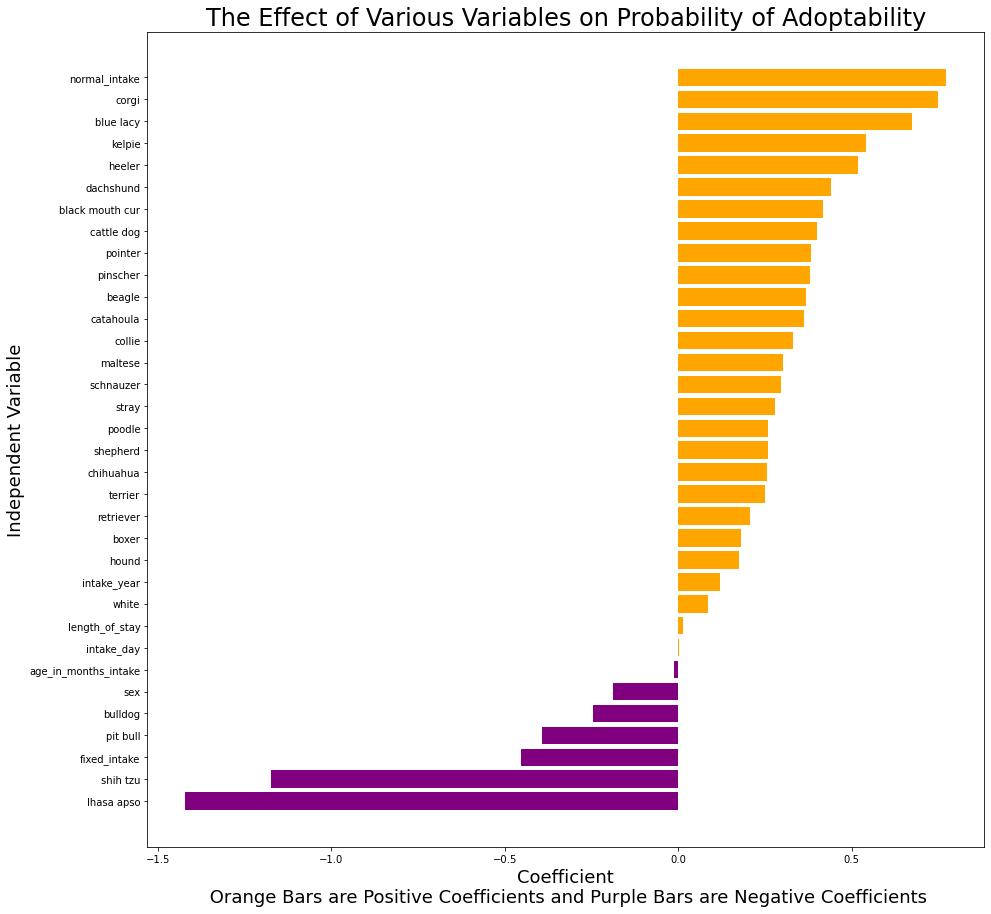

In [81]:
#plot the coefficients to visualize which have an inpact on the model predictability
plt.figure(figsize=(15, 15))
plt.barh(adopted_vs_all_coeff.index, adopted_vs_all_coeff['Coefficient'], color = colors)
plt.title("The Effect of Various Variables on Probability of Adoptability", size=24)
plt.ylabel("Independent Variable", size=18)
plt.xlabel('Coefficient\n Orange Bars are Positive Coefficients and Purple Bars are Negative Coefficients', size=18)
plt.show()

In [82]:
#interpet the coefficient with the highest coefficient
max_coeff = adopted_vs_all_coeff['Coefficient'][-1:]
max_odds_ratio = np.exp(max_coeff)

In [83]:
#interpet the coefficient with the lowest coefficient
min_coeff = adopted_vs_all_coeff['Coefficient'][0]
min_odds_ratio = np.exp(min_coeff)

From this visual, you can see that most variables positively impact the adoptability of the dog in the Austin, TX shelter. If you take the independent variable with the largest coefficient, it has a coefficient of about 0.77. We can use this coefficient to calculate the odds ratio which is e^(0.77)=2.2. This odds ratio tells us that a dog that has a normal intake is approximately 2.2 times more likely to get adopted.
On the flip side, the largest negative coefficient is the breed Lhasa Apso. This independent variable has a coefficient of -1.4 and the odds ratio can be calculated as e^(-1.4)=0.24. This can be interpreted as a Lhasa Apso (breed) is about 5 times less likely to be adopted. 

## Model Evaluation 
<a class="anchor" id="eval"></a>

In [84]:
# getting probabiistic and binary predictions
model_predictions_prob = mylogreg_adopt_results18.predict(X_withconstant)
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)

In [85]:
# How many did we predict right?
(model_predictions_binary == modeling_df18['adopted']).sum()

19980

In [86]:
# How many data points to we have?
len(modeling_df18['adopted'])

29883

In [87]:
print("The classification accuracy is:", round((19980/29883)*100, 1) , "%")
print("The base level prediction is:", round(modeling_df18['adopted'].sum()/len(modeling_df18['adopted'])*100, 1), "%")
print(f"That is a {round(((19980/29883) - (modeling_df18['adopted'].sum()/len(modeling_df18['adopted'])))*100,2)}% increase from base level.")

The classification accuracy is: 66.9 %
The base level prediction is: 44.3 %
That is a 22.6% increase from base level.


That is a decent increase on base level. That means that using this model I can accurately predict if a dog will be adopted or not about 67% of the time. Since the base level is 44%, this model is likely useful for a shelter. That means that a shelter can potentially save 20% more expenses, freeing up valuable resources for other rescues. It also means that dogs can be placed in facilities that will provide them a better quality of life at least 20% more often. 

As previously mentioned, I would like to test a different split on the target variable because it is questionable to say a dog that is returned to it's owner or passes away is not adoptable. In the next section I will eliminate dogs from these kinds of circumstances. 

# Adopted or Moved to Partner/Euthanized
<a class="anchor" id="partner"></a>

Would like to re-evaluate the adoptability column and drop everything that isn't partner/euthanized vs. adopted. The assumption here is that dogs are being transfered to partner facilities because they are struggling to find a forever home or that shelters are euthanizing dogs that are not being adopted. The sad truth is that shelter simple do not have the time or resources to care for every rescue. The hard reality is that the most human thing to do most of the time is put these animals to sleep. There are many "no kill" shelters in the US and around the world, but it is highly debatible if dogs have a good quality of life in these facilities. Animal lovers who spend their time managing these facilities and caring for rescues find this to be the hardest part of the job, but there is simply no other solution a majority of the time. 

In [88]:
#read in the different split df
new_adopt_dfA = pd.read_csv('Tabular Data/new_adopt_category.csv')

In [89]:
#drop the key
new_adopt_dfA.drop('Animal ID', axis = 1, inplace = True)

In [90]:
#check that all columns are numerical
new_adopt_dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21462 entries, 0 to 21461
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   stray                  21462 non-null  int64  
 1   normal_intake          21462 non-null  int64  
 2   age_in_months_intake   21462 non-null  float64
 3   adopted                21462 non-null  int64  
 4   age_in_months_outcome  21462 non-null  float64
 5   sex                    21462 non-null  int64  
 6   fixed_intake           21462 non-null  int64  
 7   fixed_changed          21462 non-null  int64  
 8   retriever              21462 non-null  int64  
 9   shepherd               21462 non-null  int64  
 10  beagle                 21462 non-null  int64  
 11  terrier                21462 non-null  int64  
 12  boxer                  21462 non-null  int64  
 13  poodle                 21462 non-null  int64  
 14  rottweiler             21462 non-null  int64  
 15  da

## Logistic Regression Model (Adopted or Moved to Partner/Euthanized)
<a class="anchor" id="logic"></a>

Now that the new data is loaded, I will follow the same iterative process to build a statistically significant model where all of the coefficients have a p-value less than 0.05. Similar to the previous section, I will not have as much markdown, because I will be doing the same steps several times. I will start by checking if any independent variables are strongly correlated with each other. After any variables that need to be removed are dropped, I will fit a logistic regression model. If any of the coefficients have a p-value above 0.05, I will delete the coefficient with the highest p-value, one at a time until all p-values are below the threshold. At which point I will examine the coefficients' meaning and evaluate the model. 

### Model A

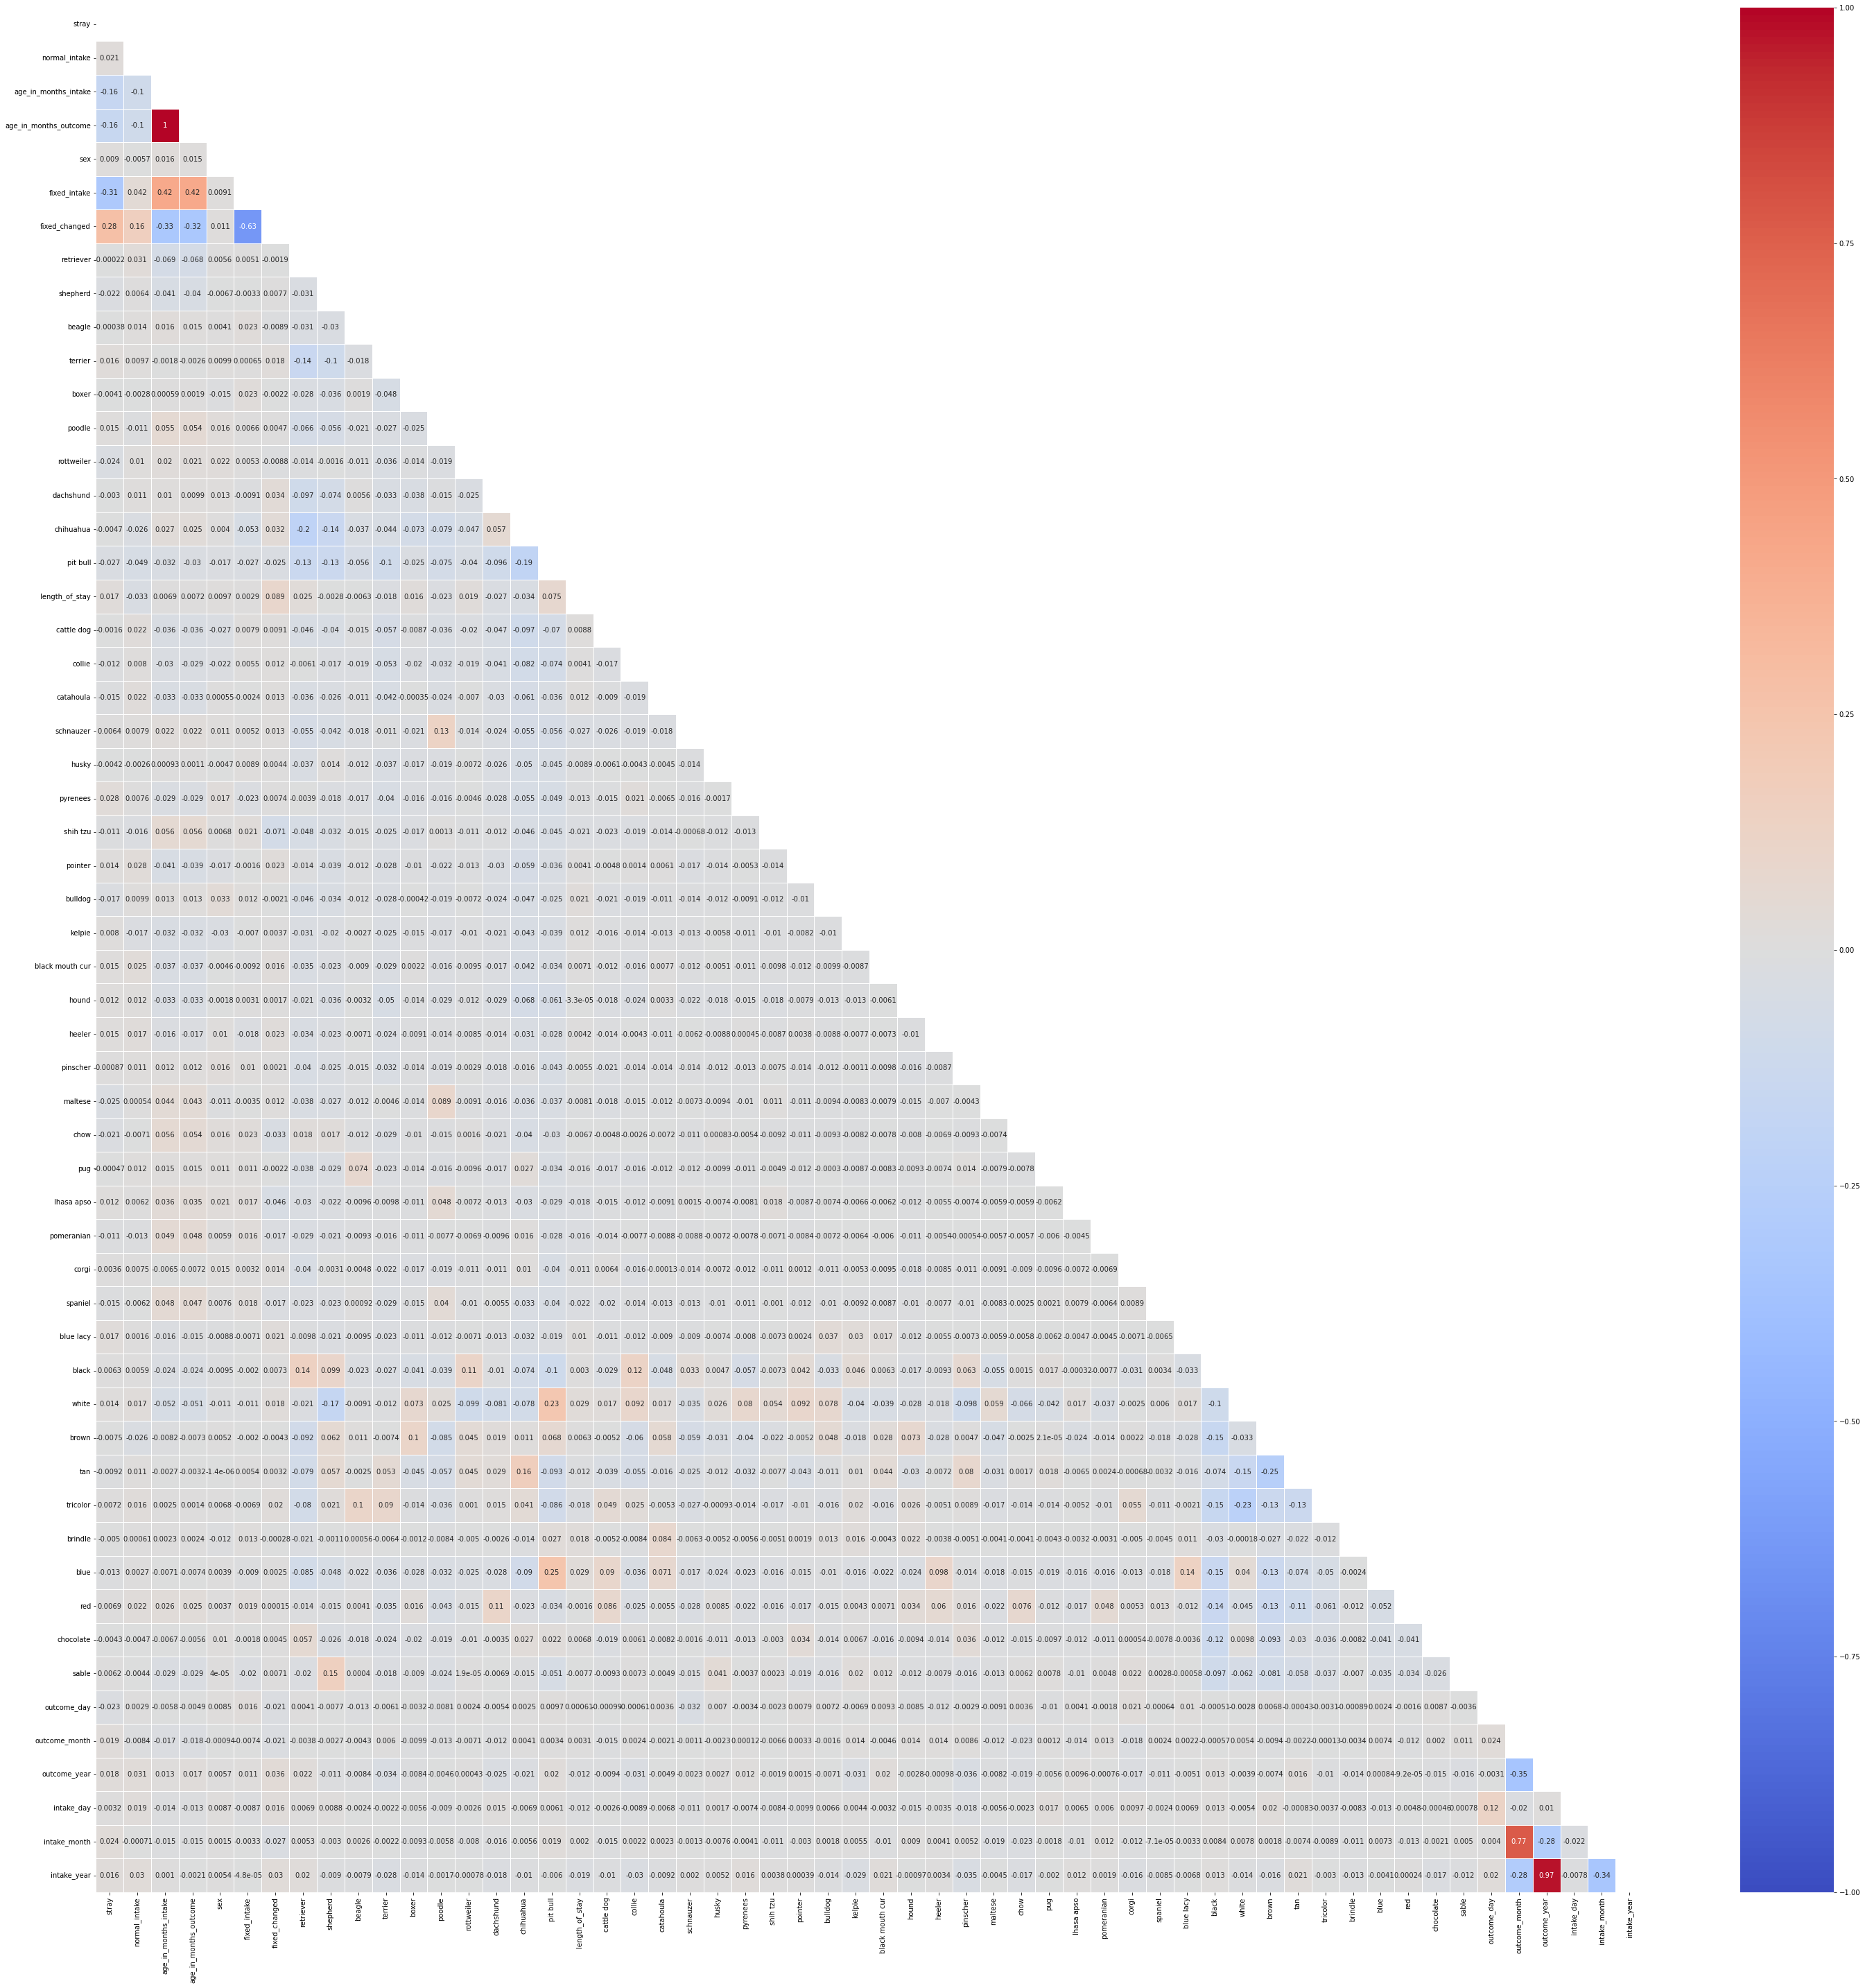

In [91]:
X = new_adopt_dfA.drop('adopted', axis=1)

X_corr = X.corr()
mask = np.triu(X_corr)

# 1. Check the correlations in this data set. Can't have any multicollinearity 
plt.figure(figsize=(50,50))
sns.heatmap(X.corr(), cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True, lw=1, mask = mask)
plt.show()

It looks like the same columns that were highly correlated in the previous section are also correlated here. This makes since because, even though there are fewer dogs represented in this dataset, the data did originate from the same place and thus the independent variables should have similar distributions. 

In [92]:
#drop the highy correlated columns
new_adopt_dfA.drop(['age_in_months_outcome', 'fixed_changed', 'outcome_year', 'outcome_month', 'outcome_day'], axis=1, inplace=True)

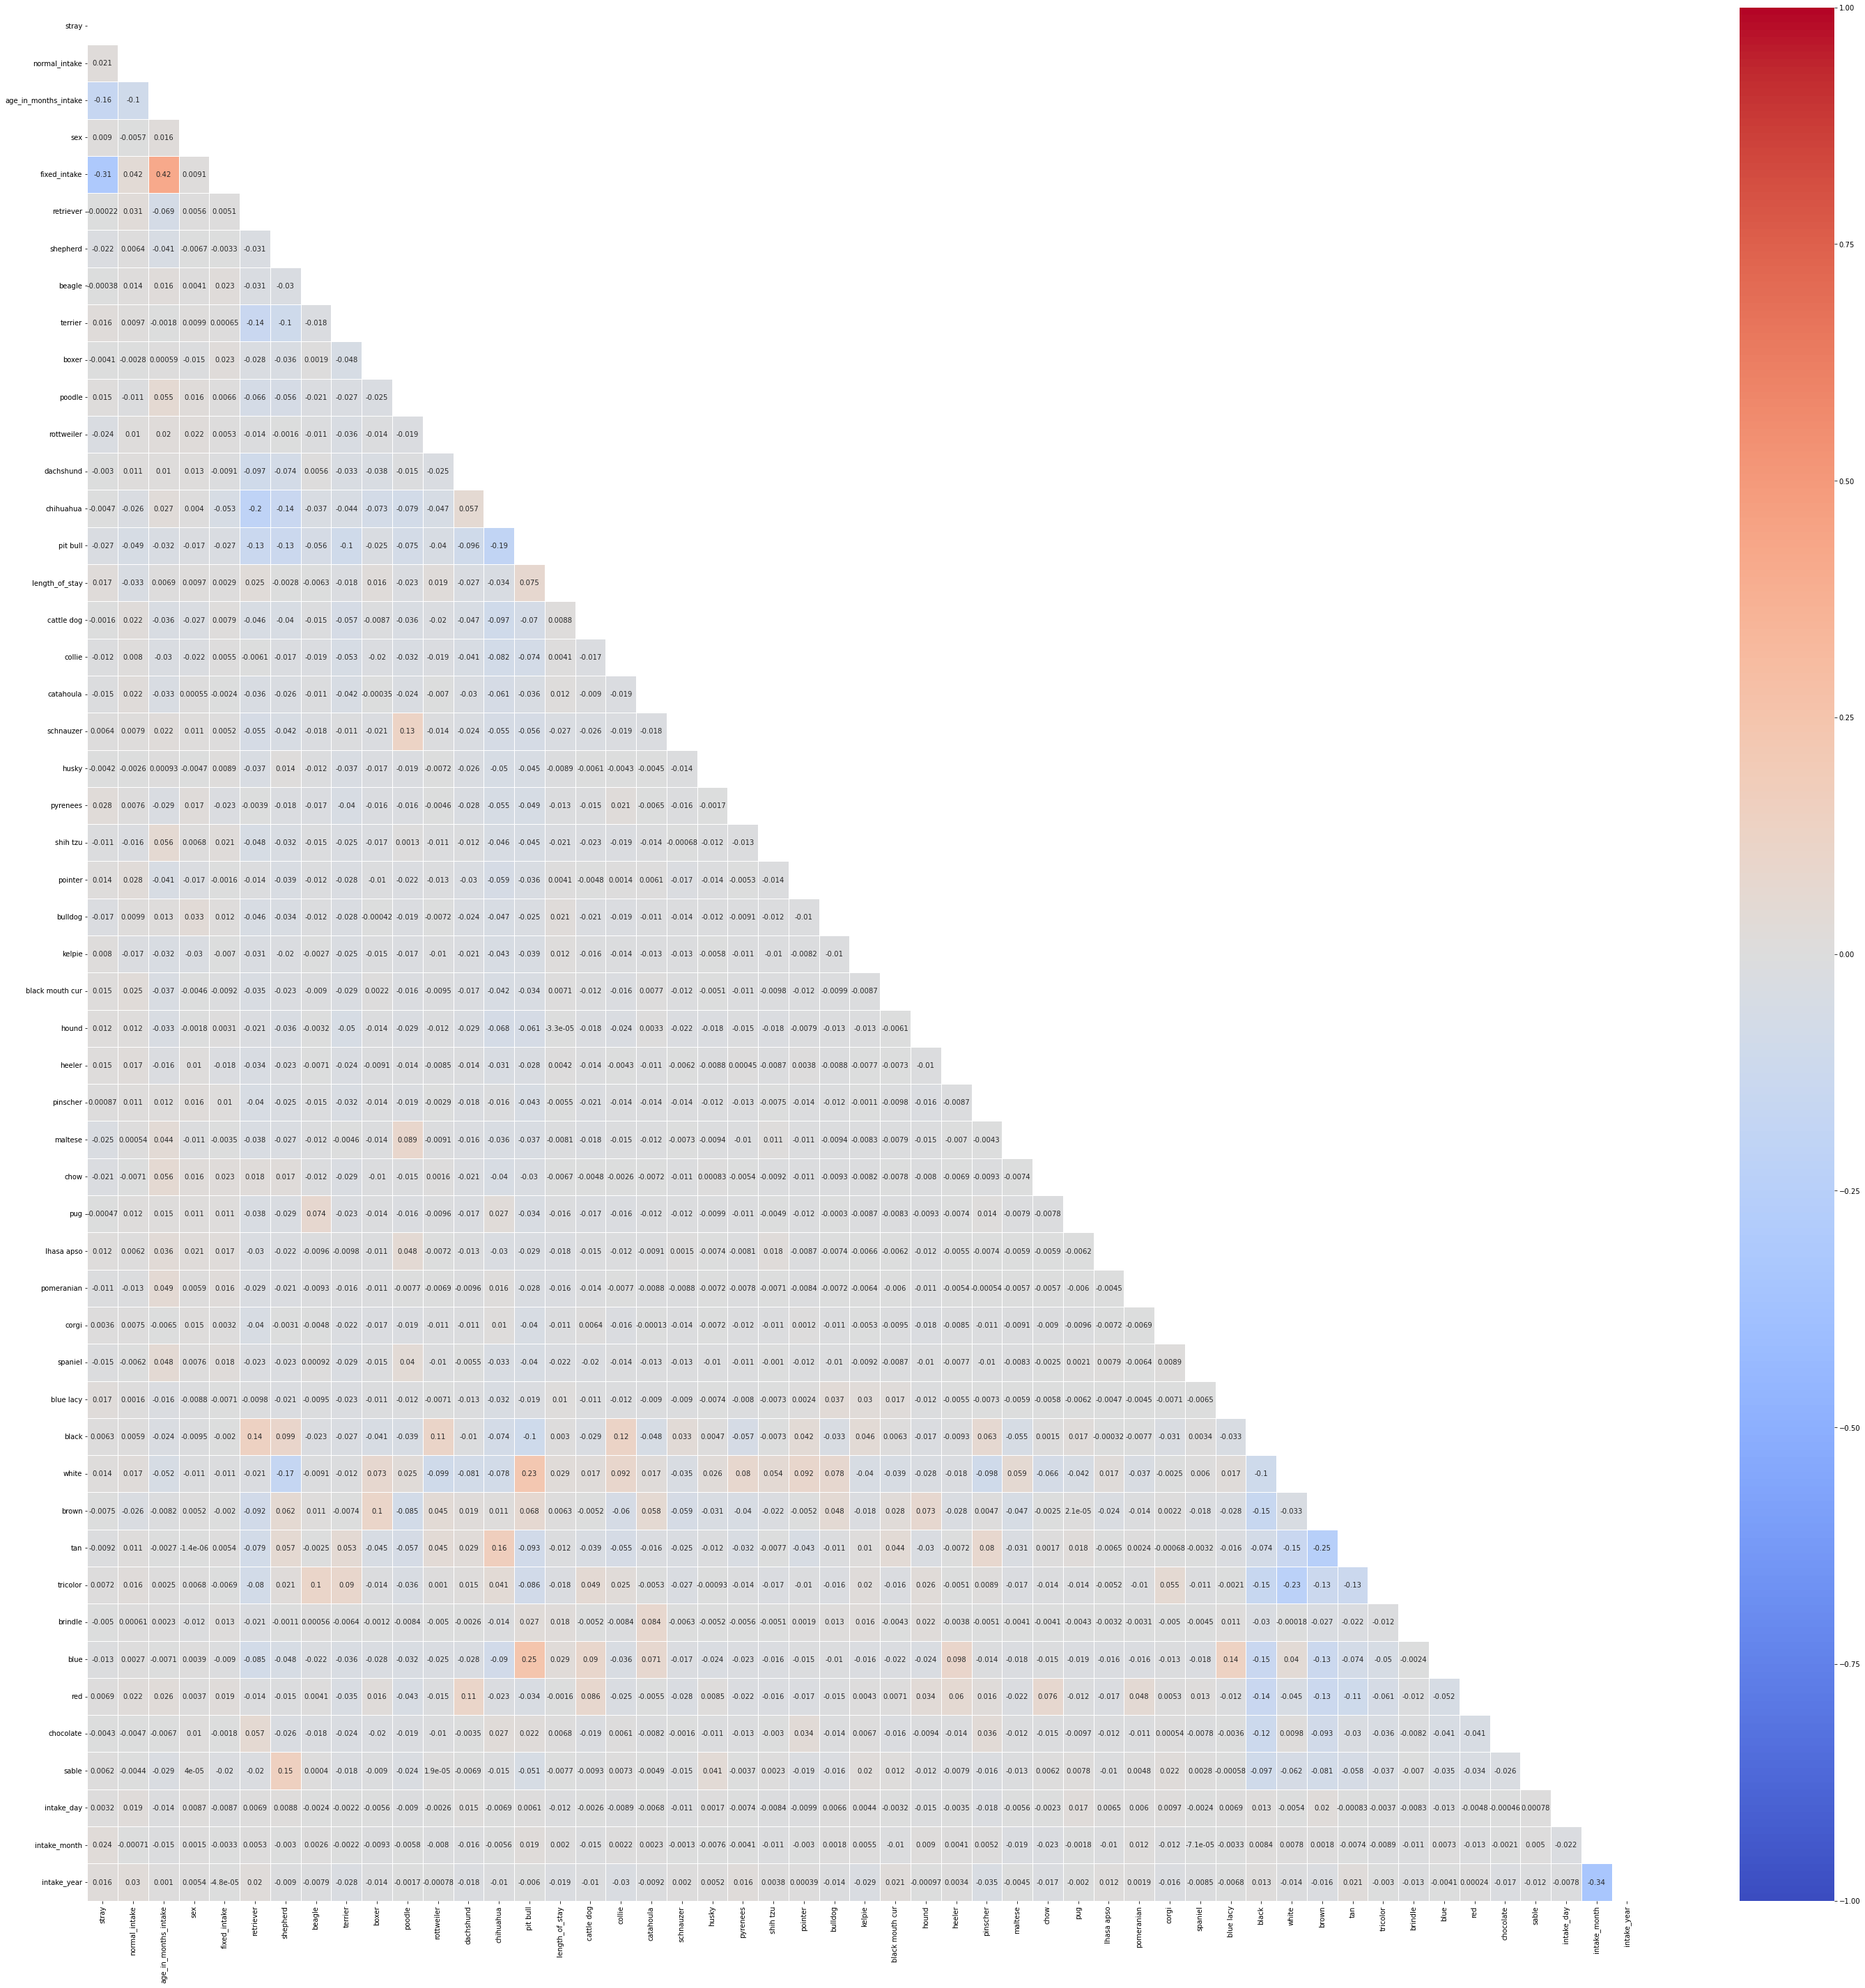

In [93]:
X = new_adopt_dfA.drop('adopted', axis=1)

X_corr = X.corr()
mask = np.triu(X_corr)

# 1. Check the correlations in this data set. Can't have any multicollinearity 
plt.figure(figsize=(50,50))
sns.heatmap(X.corr(), cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True, lw=1, mask = mask)
plt.show()

Perfect, by dropping those columns, there are no longer any columns that are highly correlated with each other and I am ready to start fitting the logistic regression model. 

In [94]:
# Define our X and y
X = new_adopt_dfA.drop('adopted', axis=1)
y = new_adopt_dfA['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [95]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adopt= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_results = mylogreg_adopt.fit()

# Look at summary
mylogreg_adopt_results.summary()

Optimization terminated successfully.
         Current function value: 0.614629
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21410
Method:                           MLE   Df Model:                           51
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07698
Time:                        12:52:14   Log-Likelihood:                -13191.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0686      0.490     12.380      0.000       5.108       7.029
stray                    0.5351      0.036     14.984      0.000       0.465       0.605
normal_intake            1.1454      0.048     23.699      0.000       1.051       1.240
age_in_months_intake    -0.0079      0.001    -14.950      0.000      -0.009      -0.007
sex                     -0.0857      0.030     -2.880      0.004      -0.144      -0.027
fixed_intake             0.2691      0.041      6.631      0.000       0.190       0.349
retriever                0.1267      0.050      2.514      0.012       0.028       0.225
shepherd                 0.2548      0.063      4.062      0.000       0.132       0.378
beagle                   0.2694      0.113      2.380      0.017       0.048       0.491
terrier                  0.1735      0.056      3.088      0.002       0.063       0.284
boxer                    0.1905      0.101      1.891      0.059      -0.007       0.388
poodle                   0.4132      0.095      4.346      0.000       0.227       0.599
rottweiler               0.1319      0.149      0.887      0.375      -0.160       0.423
dachshund                0.2463      0.071      3.470      0.001       0.107       0.385
chihuahua                0.1118      0.051      2.200      0.028       0.012       0.211
pit bull                -0.3360      0.055     -6.108      0.000      -0.444      -0.228
length_of_stay           0.0079      0.001     13.939      0.000       0.007       0.009
cattle dog               0.2509      0.081      3.095      0.002       0.092       0.410
collie                   0.2599      0.094      2.766      0.006       0.076       0.444
catahoula                0.2550      0.122      2.096      0.036       0.017       0.493
schnauzer                0.2244      0.119      1.881      0.060      -0.009       0.458
husky                    0.5574      0.151      3.695      0.000       0.262       0.853
pyrenees                -0.0176      0.130     -0.135      0.892      -0.273       0.238
shih tzu                -1.5396      0.162     -9.504      0.000      -1.857      -1.222
pointer                  0.2369      0.127      1.860      0.063      -0.013       0.487
bulldog                 -0.1395      0.138     -1.012      0.312      -0.410       0.131
kelpie                   0.3372      0.167      2.023      0.043       0.010       0.664
black mouth cur          0.1600      0.174      0.920      0.357      -0.181       0.501
hound                    0.0297      0.094      0.317      0.751      -0.154       0.213
heeler                   0.2715      0.195      1.392      0.164      -0.111       0.654
pinscher                 0.3173      0.146      2.175      0.030       0.031       0.603
maltese                  0.5684      0.181      3.136      0.002       0.213       0.924
chow                    -0.1427      0.172     -0.828      0.408      -0.481       0.195
pug                     -0.2584      

In [96]:
mylogreg_adopt_results.pvalues.max()
#pyrenees

0.8922825146673068

### Model B

In [97]:
new_adopt_dfB = new_adopt_dfA.copy()

new_adopt_dfB.drop('pyrenees', axis=1, inplace=True)

In [98]:
# Define our X and y
X = new_adopt_dfB.drop('adopted', axis=1)
y = new_adopt_dfB['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [99]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptB= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsB= mylogreg_adoptB.fit()

# Look at summary
mylogreg_adopt_resultsB.summary()

Optimization terminated successfully.
         Current function value: 0.614630
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21411
Method:                           MLE   Df Model:                           50
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07698
Time:                        12:52:15   Log-Likelihood:                -13191.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0666      0.490     12.381      0.000       5.106       7.027
stray                    0.5351      0.036     14.984      0.000       0.465       0.605
normal_intake            1.1454      0.048     23.698      0.000       1.051       1.240
age_in_months_intake    -0.0079      0.001    -14.953      0.000      -0.009      -0.007
sex                     -0.0858      0.030     -2.884      0.004      -0.144      -0.027
fixed_intake             0.2691      0.041      6.633      0.000       0.190       0.349
retriever                0.1276      0.050      2.555      0.011       0.030       0.226
shepherd                 0.2555      0.062      4.089      0.000       0.133       0.378
beagle                   0.2703      0.113      2.391      0.017       0.049       0.492
terrier                  0.1745      0.056      3.134      0.002       0.065       0.284
boxer                    0.1915      0.100      1.906      0.057      -0.005       0.388
poodle                   0.4145      0.095      4.382      0.000       0.229       0.600
rottweiler               0.1323      0.149      0.890      0.374      -0.159       0.424
dachshund                0.2471      0.071      3.491      0.000       0.108       0.386
chihuahua                0.1130      0.050      2.253      0.024       0.015       0.211
pit bull                -0.3347      0.054     -6.180      0.000      -0.441      -0.229
length_of_stay           0.0079      0.001     13.941      0.000       0.007       0.009
cattle dog               0.2519      0.081      3.117      0.002       0.094       0.410
collie                   0.2606      0.094      2.777      0.005       0.077       0.445
catahoula                0.2558      0.121      2.106      0.035       0.018       0.494
schnauzer                0.2255      0.119      1.895      0.058      -0.008       0.459
husky                    0.5584      0.151      3.706      0.000       0.263       0.854
shih tzu                -1.5382      0.162     -9.514      0.000      -1.855      -1.221
pointer                  0.2378      0.127      1.870      0.061      -0.011       0.487
bulldog                 -0.1383      0.138     -1.005      0.315      -0.408       0.131
kelpie                   0.3382      0.167      2.030      0.042       0.012       0.665
black mouth cur          0.1610      0.174      0.927      0.354      -0.179       0.502
hound                    0.0306      0.093      0.328      0.743      -0.152       0.214
heeler                   0.2722      0.195      1.396      0.163      -0.110       0.654
pinscher                 0.3179      0.146      2.180      0.029       0.032       0.604
maltese                  0.5700      0.181      3.151      0.002       0.215       0.925
chow                    -0.1422      0.172     -0.825      0.410      -0.480       0.196
pug                     -0.2577      0.160     -1.613      0.107      -0.571       0.055
lhasa apso              -1.8960      

In [100]:
mylogreg_adopt_resultsB.pvalues.max()
#intake_month

0.8749366871279428

### Model C

In [101]:
new_adopt_dfC = new_adopt_dfB.copy()

new_adopt_dfC.drop('intake_month', axis=1, inplace=True)

In [102]:
# Define our X and y
X = new_adopt_dfC.drop('adopted', axis=1)
y = new_adopt_dfC['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [103]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptC= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsC= mylogreg_adoptC.fit()

# Look at summary
mylogreg_adopt_resultsC.summary()

Optimization terminated successfully.
         Current function value: 0.614630
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21412
Method:                           MLE   Df Model:                           49
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07698
Time:                        12:52:15   Log-Likelihood:                -13191.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0445      0.469     12.878      0.000       5.125       6.964
stray                    0.5353      0.036     14.994      0.000       0.465       0.605
normal_intake            1.1455      0.048     23.701      0.000       1.051       1.240
age_in_months_intake    -0.0079      0.001    -14.957      0.000      -0.009      -0.007
sex                     -0.0858      0.030     -2.883      0.004      -0.144      -0.027
fixed_intake             0.2692      0.041      6.635      0.000       0.190       0.349
retriever                0.1275      0.050      2.553      0.011       0.030       0.225
shepherd                 0.2553      0.062      4.087      0.000       0.133       0.378
beagle                   0.2702      0.113      2.390      0.017       0.049       0.492
terrier                  0.1742      0.056      3.130      0.002       0.065       0.283
boxer                    0.1911      0.100      1.903      0.057      -0.006       0.388
poodle                   0.4142      0.095      4.380      0.000       0.229       0.600
rottweiler               0.1319      0.149      0.887      0.375      -0.159       0.423
dachshund                0.2467      0.071      3.487      0.000       0.108       0.385
chihuahua                0.1127      0.050      2.250      0.024       0.015       0.211
pit bull                -0.3348      0.054     -6.182      0.000      -0.441      -0.229
length_of_stay           0.0079      0.001     13.940      0.000       0.007       0.009
cattle dog               0.2515      0.081      3.114      0.002       0.093       0.410
collie                   0.2602      0.094      2.774      0.006       0.076       0.444
catahoula                0.2557      0.121      2.105      0.035       0.018       0.494
schnauzer                0.2253      0.119      1.893      0.058      -0.008       0.459
husky                    0.5581      0.151      3.704      0.000       0.263       0.853
shih tzu                -1.5386      0.162     -9.517      0.000      -1.855      -1.222
pointer                  0.2376      0.127      1.868      0.062      -0.012       0.487
bulldog                 -0.1385      0.138     -1.007      0.314      -0.408       0.131
kelpie                   0.3379      0.167      2.029      0.043       0.011       0.664
black mouth cur          0.1607      0.174      0.925      0.355      -0.180       0.501
hound                    0.0305      0.093      0.327      0.744      -0.153       0.214
heeler                   0.2722      0.195      1.396      0.163      -0.110       0.654
pinscher                 0.3176      0.146      2.178      0.029       0.032       0.603
maltese                  0.5691      0.181      3.148      0.002       0.215       0.924
chow                    -0.1431      0.172     -0.830      0.406      -0.481       0.195
pug                     -0.2580      0.160     -1.615      0.106      -0.571       0.055
lhasa apso              -1.8962      

In [104]:
mylogreg_adopt_resultsC.pvalues.max()
#hound

0.74361909961781

### Model D

In [105]:
new_adopt_dfD = new_adopt_dfC.copy()

new_adopt_dfD.drop('hound', axis=1, inplace=True)

In [106]:
# Define our X and y
X = new_adopt_dfD.drop('adopted', axis=1)
y = new_adopt_dfD['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [107]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptD= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsD= mylogreg_adoptD.fit()

# Look at summary
mylogreg_adopt_resultsD.summary()

Optimization terminated successfully.
         Current function value: 0.614633
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21413
Method:                           MLE   Df Model:                           48
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07698
Time:                        12:52:15   Log-Likelihood:                -13191.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0452      0.469     12.879      0.000       5.125       6.965
stray                    0.5352      0.036     14.993      0.000       0.465       0.605
normal_intake            1.1456      0.048     23.704      0.000       1.051       1.240
age_in_months_intake    -0.0079      0.001    -14.992      0.000      -0.009      -0.007
sex                     -0.0858      0.030     -2.883      0.004      -0.144      -0.027
fixed_intake             0.2694      0.041      6.639      0.000       0.190       0.349
retriever                0.1248      0.049      2.534      0.011       0.028       0.221
shepherd                 0.2517      0.062      4.092      0.000       0.131       0.372
beagle                   0.2678      0.113      2.374      0.018       0.047       0.489
terrier                  0.1710      0.055      3.122      0.002       0.064       0.278
boxer                    0.1880      0.100      1.880      0.060      -0.008       0.384
poodle                   0.4115      0.094      4.368      0.000       0.227       0.596
rottweiler               0.1282      0.148      0.865      0.387      -0.162       0.419
dachshund                0.2439      0.070      3.474      0.001       0.106       0.381
chihuahua                0.1091      0.049      2.233      0.026       0.013       0.205
pit bull                -0.3386      0.053     -6.401      0.000      -0.442      -0.235
length_of_stay           0.0079      0.001     13.942      0.000       0.007       0.009
cattle dog               0.2483      0.080      3.097      0.002       0.091       0.405
collie                   0.2570      0.093      2.755      0.006       0.074       0.440
catahoula                0.2527      0.121      2.087      0.037       0.015       0.490
schnauzer                0.2223      0.119      1.874      0.061      -0.010       0.455
husky                    0.5548      0.150      3.690      0.000       0.260       0.849
shih tzu                -1.5421      0.161     -9.559      0.000      -1.858      -1.226
pointer                  0.2349      0.127      1.851      0.064      -0.014       0.484
bulldog                 -0.1421      0.137     -1.037      0.300      -0.411       0.127
kelpie                   0.3340      0.166      2.010      0.044       0.008       0.660
black mouth cur          0.1571      0.173      0.906      0.365      -0.183       0.497
heeler                   0.2686      0.195      1.380      0.168      -0.113       0.650
pinscher                 0.3139      0.145      2.159      0.031       0.029       0.599
maltese                  0.5665      0.181      3.136      0.002       0.212       0.921
chow                    -0.1455      0.172     -0.845      0.398      -0.483       0.192
pug                     -0.2601      0.160     -1.629      0.103      -0.573       0.053
lhasa apso              -1.8991      0.263     -7.220      0.000      -2.415      -1.384
pomeranian              -0.4329      

In [108]:
mylogreg_adopt_resultsD.pvalues.max()
#chow

0.39812921595546813

### Model E
<a class="anchor" id="e"></a>

In [109]:
new_adopt_dfE = new_adopt_dfD.copy()

new_adopt_dfE.drop('chow', axis=1, inplace=True)

In [110]:
# Define our X and y
X = new_adopt_dfE.drop('adopted', axis=1)
y = new_adopt_dfE['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [111]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptE= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsE= mylogreg_adoptE.fit()

# Look at summary
mylogreg_adopt_resultsE.summary()

Optimization terminated successfully.
         Current function value: 0.614650
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21414
Method:                           MLE   Df Model:                           47
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07695
Time:                        12:52:16   Log-Likelihood:                -13192.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0506      0.469     12.892      0.000       5.131       6.970
stray                    0.5357      0.036     15.011      0.000       0.466       0.606
normal_intake            1.1455      0.048     23.702      0.000       1.051       1.240
age_in_months_intake    -0.0079      0.001    -15.034      0.000      -0.009      -0.007
sex                     -0.0862      0.030     -2.897      0.004      -0.144      -0.028
fixed_intake             0.2695      0.041      6.645      0.000       0.190       0.349
retriever                0.1266      0.049      2.575      0.010       0.030       0.223
shepherd                 0.2538      0.061      4.130      0.000       0.133       0.374
beagle                   0.2706      0.113      2.400      0.016       0.050       0.492
terrier                  0.1740      0.055      3.185      0.001       0.067       0.281
boxer                    0.1907      0.100      1.908      0.056      -0.005       0.387
poodle                   0.4145      0.094      4.403      0.000       0.230       0.599
rottweiler               0.1314      0.148      0.887      0.375      -0.159       0.422
dachshund                0.2474      0.070      3.530      0.000       0.110       0.385
chihuahua                0.1127      0.049      2.315      0.021       0.017       0.208
pit bull                -0.3356      0.053     -6.360      0.000      -0.439      -0.232
length_of_stay           0.0079      0.001     13.947      0.000       0.007       0.009
cattle dog               0.2509      0.080      3.133      0.002       0.094       0.408
collie                   0.2588      0.093      2.775      0.006       0.076       0.442
catahoula                0.2554      0.121      2.109      0.035       0.018       0.493
schnauzer                0.2256      0.119      1.902      0.057      -0.007       0.458
husky                    0.5570      0.150      3.706      0.000       0.262       0.852
shih tzu                -1.5390      0.161     -9.542      0.000      -1.855      -1.223
pointer                  0.2372      0.127      1.869      0.062      -0.011       0.486
bulldog                 -0.1390      0.137     -1.015      0.310      -0.408       0.130
kelpie                   0.3378      0.166      2.034      0.042       0.012       0.663
black mouth cur          0.1611      0.173      0.929      0.353      -0.179       0.501
heeler                   0.2729      0.195      1.403      0.161      -0.108       0.654
pinscher                 0.3183      0.145      2.190      0.029       0.033       0.603
maltese                  0.5693      0.181      3.152      0.002       0.215       0.923
pug                     -0.2574      0.160     -1.613      0.107      -0.570       0.055
lhasa apso              -1.8965      0.263     -7.210      0.000      -2.412      -1.381
pomeranian              -0.4285      0.221     -1.938      0.053      -0.862       0.005
corgi                    0.6253      

In [112]:
mylogreg_adopt_resultsE.pvalues.max()
#rottweiler

0.37510966628295983

### Model F

In [113]:
new_adopt_dfF = new_adopt_dfE.copy()

new_adopt_dfF.drop('rottweiler', axis=1, inplace=True)

In [114]:
# Define our X and y
X = new_adopt_dfF.drop('adopted', axis=1)
y = new_adopt_dfF['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [115]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptF= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsF= mylogreg_adoptF.fit()

# Look at summary
mylogreg_adopt_resultsF.summary()

Optimization terminated successfully.
         Current function value: 0.614668
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21415
Method:                           MLE   Df Model:                           46
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07692
Time:                        12:52:16   Log-Likelihood:                -13192.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0472      0.469     12.885      0.000       5.127       6.967
stray                    0.5347      0.036     14.990      0.000       0.465       0.605
normal_intake            1.1463      0.048     23.722      0.000       1.052       1.241
age_in_months_intake    -0.0079      0.001    -15.026      0.000      -0.009      -0.007
sex                     -0.0857      0.030     -2.880      0.004      -0.144      -0.027
fixed_intake             0.2689      0.041      6.630      0.000       0.189       0.348
retriever                0.1219      0.049      2.493      0.013       0.026       0.218
shepherd                 0.2472      0.061      4.053      0.000       0.128       0.367
beagle                   0.2661      0.113      2.362      0.018       0.045       0.487
terrier                  0.1684      0.054      3.104      0.002       0.062       0.275
boxer                    0.1861      0.100      1.864      0.062      -0.010       0.382
poodle                   0.4114      0.094      4.373      0.000       0.227       0.596
dachshund                0.2420      0.070      3.466      0.001       0.105       0.379
chihuahua                0.1064      0.048      2.209      0.027       0.012       0.201
pit bull                -0.3410      0.052     -6.505      0.000      -0.444      -0.238
length_of_stay           0.0079      0.001     13.970      0.000       0.007       0.009
cattle dog               0.2456      0.080      3.075      0.002       0.089       0.402
collie                   0.2531      0.093      2.720      0.007       0.071       0.435
catahoula                0.2504      0.121      2.071      0.038       0.013       0.487
schnauzer                0.2206      0.118      1.862      0.063      -0.012       0.453
husky                    0.5524      0.150      3.678      0.000       0.258       0.847
shih tzu                -1.5439      0.161     -9.579      0.000      -1.860      -1.228
pointer                  0.2324      0.127      1.833      0.067      -0.016       0.481
bulldog                 -0.1440      0.137     -1.052      0.293      -0.412       0.124
kelpie                   0.3301      0.166      1.991      0.047       0.005       0.655
black mouth cur          0.1533      0.173      0.886      0.376      -0.186       0.493
heeler                   0.2667      0.194      1.372      0.170      -0.114       0.648
pinscher                 0.3102      0.145      2.139      0.032       0.026       0.594
maltese                  0.5673      0.181      3.141      0.002       0.213       0.921
pug                     -0.2622      0.160     -1.644      0.100      -0.575       0.050
lhasa apso              -1.9006      0.263     -7.227      0.000      -2.416      -1.385
pomeranian              -0.4335      0.221     -1.961      0.050      -0.867      -0.000
corgi                    0.6212      0.157      3.945      0.000       0.313       0.930
spaniel                 -0.3776      

In [116]:
mylogreg_adopt_resultsF.pvalues.max()
#black mouth cur

0.37587878105812944

### Model G

In [117]:
new_adopt_dfG = new_adopt_dfF.copy()

new_adopt_dfG.drop('black mouth cur', axis=1, inplace=True)

In [118]:
# Define our X and y
X = new_adopt_dfG.drop('adopted', axis=1)
y = new_adopt_dfG['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [119]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptG= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsG= mylogreg_adoptG.fit()

# Look at summary
mylogreg_adopt_resultsG.summary()

Optimization terminated successfully.
         Current function value: 0.614687
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21416
Method:                           MLE   Df Model:                           45
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07690
Time:                        12:52:17   Log-Likelihood:                -13192.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0556      0.469     12.905      0.000       5.136       6.975
stray                    0.5347      0.036     14.991      0.000       0.465       0.605
normal_intake            1.1473      0.048     23.748      0.000       1.053       1.242
age_in_months_intake    -0.0079      0.001    -15.079      0.000      -0.009      -0.007
sex                     -0.0857      0.030     -2.883      0.004      -0.144      -0.027
fixed_intake             0.2689      0.041      6.630      0.000       0.189       0.348
retriever                0.1169      0.049      2.407      0.016       0.022       0.212
shepherd                 0.2414      0.061      3.981      0.000       0.123       0.360
beagle                   0.2624      0.113      2.331      0.020       0.042       0.483
terrier                  0.1637      0.054      3.031      0.002       0.058       0.270
boxer                    0.1830      0.100      1.834      0.067      -0.013       0.378
poodle                   0.4077      0.094      4.337      0.000       0.223       0.592
dachshund                0.2378      0.070      3.414      0.001       0.101       0.374
chihuahua                0.1008      0.048      2.110      0.035       0.007       0.194
pit bull                -0.3462      0.052     -6.645      0.000      -0.448      -0.244
length_of_stay           0.0079      0.001     13.980      0.000       0.007       0.009
cattle dog               0.2412      0.080      3.025      0.002       0.085       0.397
collie                   0.2486      0.093      2.675      0.007       0.066       0.431
catahoula                0.2473      0.121      2.046      0.041       0.010       0.484
schnauzer                0.2162      0.118      1.826      0.068      -0.016       0.448
husky                    0.5482      0.150      3.651      0.000       0.254       0.842
shih tzu                -1.5488      0.161     -9.614      0.000      -1.865      -1.233
pointer                  0.2280      0.127      1.800      0.072      -0.020       0.476
bulldog                 -0.1493      0.137     -1.091      0.275      -0.417       0.119
kelpie                   0.3242      0.166      1.956      0.050      -0.001       0.649
heeler                   0.2613      0.194      1.344      0.179      -0.120       0.642
pinscher                 0.3041      0.145      2.099      0.036       0.020       0.588
maltese                  0.5640      0.181      3.123      0.002       0.210       0.918
pug                     -0.2661      0.159     -1.669      0.095      -0.579       0.046
lhasa apso              -1.9047      0.263     -7.244      0.000      -2.420      -1.389
pomeranian              -0.4377      0.221     -1.981      0.048      -0.871      -0.005
corgi                    0.6176      0.157      3.924      0.000       0.309       0.926
spaniel                 -0.3818      0.153     -2.494      0.013      -0.682      -0.082
blue lacy                0.6933      

In [120]:
mylogreg_adopt_resultsG.pvalues.max()
#bulldog

0.2751786336852702

### Model H

In [121]:
new_adopt_dfH = new_adopt_dfG.copy()

new_adopt_dfH.drop('bulldog', axis=1, inplace=True)

In [122]:
# Define our X and y
X = new_adopt_dfH.drop('adopted', axis=1)
y = new_adopt_dfH['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [123]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptH= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsH= mylogreg_adoptH.fit()

# Look at summary
mylogreg_adopt_resultsH.summary()

Optimization terminated successfully.
         Current function value: 0.614714
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21417
Method:                           MLE   Df Model:                           44
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07685
Time:                        12:52:17   Log-Likelihood:                -13193.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0611      0.469     12.918      0.000       5.141       6.981
stray                    0.5358      0.036     15.025      0.000       0.466       0.606
normal_intake            1.1468      0.048     23.737      0.000       1.052       1.241
age_in_months_intake    -0.0079      0.001    -15.083      0.000      -0.009      -0.007
sex                     -0.0868      0.030     -2.921      0.003      -0.145      -0.029
fixed_intake             0.2691      0.041      6.636      0.000       0.190       0.349
retriever                0.1240      0.048      2.575      0.010       0.030       0.218
shepherd                 0.2482      0.060      4.114      0.000       0.130       0.366
beagle                   0.2683      0.112      2.386      0.017       0.048       0.489
terrier                  0.1703      0.054      3.173      0.002       0.065       0.275
boxer                    0.1891      0.100      1.899      0.058      -0.006       0.384
poodle                   0.4145      0.094      4.419      0.000       0.231       0.598
dachshund                0.2433      0.069      3.501      0.000       0.107       0.379
chihuahua                0.1085      0.047      2.296      0.022       0.016       0.201
pit bull                -0.3378      0.052     -6.556      0.000      -0.439      -0.237
length_of_stay           0.0079      0.001     13.962      0.000       0.007       0.009
cattle dog               0.2482      0.079      3.123      0.002       0.092       0.404
collie                   0.2561      0.093      2.763      0.006       0.074       0.438
catahoula                0.2549      0.121      2.112      0.035       0.018       0.491
schnauzer                0.2222      0.118      1.879      0.060      -0.010       0.454
husky                    0.5558      0.150      3.706      0.000       0.262       0.850
shih tzu                -1.5403      0.161     -9.572      0.000      -1.856      -1.225
pointer                  0.2350      0.127      1.857      0.063      -0.013       0.483
kelpie                   0.3313      0.166      2.001      0.045       0.007       0.656
heeler                   0.2682      0.194      1.381      0.167      -0.113       0.649
pinscher                 0.3101      0.145      2.142      0.032       0.026       0.594
maltese                  0.5720      0.180      3.170      0.002       0.218       0.926
pug                     -0.2631      0.159     -1.651      0.099      -0.576       0.049
lhasa apso              -1.8978      0.263     -7.219      0.000      -2.413      -1.383
pomeranian              -0.4323      0.221     -1.956      0.050      -0.865       0.001
corgi                    0.6233      0.157      3.962      0.000       0.315       0.932
spaniel                 -0.3752      0.153     -2.453      0.014      -0.675      -0.075
blue lacy                0.6851      0.252      2.722      0.006       0.192       1.178
black                    0.1303      

In [124]:
mylogreg_adopt_resultsH.pvalues.max()
#heeler

0.16737871654962821

### Model I

In [125]:
new_adopt_dfI = new_adopt_dfH.copy()

new_adopt_dfI.drop('heeler', axis=1, inplace=True)

In [126]:
# Define our X and y
X = new_adopt_dfI.drop('adopted', axis=1)
y = new_adopt_dfI['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [127]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptI= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsI= mylogreg_adoptI.fit()

# Look at summary
mylogreg_adopt_resultsI.summary()

Optimization terminated successfully.
         Current function value: 0.614760
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21418
Method:                           MLE   Df Model:                           43
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07679
Time:                        12:52:17   Log-Likelihood:                -13194.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0626      0.469     12.921      0.000       5.143       6.982
stray                    0.5358      0.036     15.028      0.000       0.466       0.606
normal_intake            1.1477      0.048     23.760      0.000       1.053       1.242
age_in_months_intake    -0.0080      0.001    -15.112      0.000      -0.009      -0.007
sex                     -0.0865      0.030     -2.912      0.004      -0.145      -0.028
fixed_intake             0.2685      0.041      6.620      0.000       0.189       0.348
retriever                0.1177      0.048      2.456      0.014       0.024       0.212
shepherd                 0.2417      0.060      4.019      0.000       0.124       0.360
beagle                   0.2640      0.112      2.349      0.019       0.044       0.484
terrier                  0.1646      0.054      3.076      0.002       0.060       0.270
boxer                    0.1844      0.100      1.852      0.064      -0.011       0.379
poodle                   0.4094      0.094      4.368      0.000       0.226       0.593
dachshund                0.2376      0.069      3.426      0.001       0.102       0.374
chihuahua                0.1022      0.047      2.174      0.030       0.010       0.194
pit bull                -0.3460      0.051     -6.761      0.000      -0.446      -0.246
length_of_stay           0.0079      0.001     13.971      0.000       0.007       0.009
cattle dog               0.2403      0.079      3.032      0.002       0.085       0.396
collie                   0.2514      0.093      2.715      0.007       0.070       0.433
catahoula                0.2472      0.121      2.051      0.040       0.011       0.483
schnauzer                0.2173      0.118      1.838      0.066      -0.014       0.449
husky                    0.5498      0.150      3.667      0.000       0.256       0.844
shih tzu                -1.5466      0.161     -9.615      0.000      -1.862      -1.231
pointer                  0.2320      0.126      1.834      0.067      -0.016       0.480
kelpie                   0.3243      0.165      1.960      0.050   -5.93e-05       0.649
pinscher                 0.3030      0.145      2.095      0.036       0.019       0.587
maltese                  0.5673      0.180      3.144      0.002       0.214       0.921
pug                     -0.2676      0.159     -1.679      0.093      -0.580       0.045
lhasa apso              -1.9029      0.263     -7.239      0.000      -2.418      -1.388
pomeranian              -0.4384      0.221     -1.984      0.047      -0.871      -0.005
corgi                    0.6187      0.157      3.933      0.000       0.310       0.927
spaniel                 -0.3807      0.153     -2.490      0.013      -0.680      -0.081
blue lacy                0.6740      0.252      2.680      0.007       0.181       1.167
black                    0.1311      0.039      3.400      0.001       0.056       0.207
white                    0.1200      

In [128]:
mylogreg_adopt_resultsI.pvalues.max()
#pug

0.09317401737908025

### Model J
<a class="anchor" id="j"></a>

In [129]:
new_adopt_dfJ = new_adopt_dfI.copy()
        
new_adopt_dfJ.drop('pug', axis=1, inplace=True)

In [130]:
# Define our X and y
X = new_adopt_dfJ.drop('adopted', axis=1)
y = new_adopt_dfJ['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [131]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptJ= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsJ= mylogreg_adoptJ.fit()

# Look at summary
mylogreg_adopt_resultsJ.summary()

Optimization terminated successfully.
         Current function value: 0.614825
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21419
Method:                           MLE   Df Model:                           42
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07669
Time:                        12:52:18   Log-Likelihood:                -13195.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0599      0.469     12.917      0.000       5.140       6.979
stray                    0.5358      0.036     15.028      0.000       0.466       0.606
normal_intake            1.1465      0.048     23.737      0.000       1.052       1.241
age_in_months_intake    -0.0080      0.001    -15.109      0.000      -0.009      -0.007
sex                     -0.0870      0.030     -2.926      0.003      -0.145      -0.029
fixed_intake             0.2681      0.041      6.611      0.000       0.189       0.348
retriever                0.1243      0.048      2.601      0.009       0.031       0.218
shepherd                 0.2484      0.060      4.140      0.000       0.131       0.366
beagle                   0.2527      0.112      2.253      0.024       0.033       0.472
terrier                  0.1700      0.053      3.183      0.001       0.065       0.275
boxer                    0.1893      0.100      1.902      0.057      -0.006       0.384
poodle                   0.4154      0.094      4.435      0.000       0.232       0.599
dachshund                0.2434      0.069      3.513      0.000       0.108       0.379
chihuahua                0.1048      0.047      2.229      0.026       0.013       0.197
pit bull                -0.3406      0.051     -6.669      0.000      -0.441      -0.241
length_of_stay           0.0079      0.001     13.988      0.000       0.007       0.009
cattle dog               0.2451      0.079      3.095      0.002       0.090       0.400
collie                   0.2567      0.093      2.773      0.006       0.075       0.438
catahoula                0.2524      0.121      2.094      0.036       0.016       0.489
schnauzer                0.2238      0.118      1.894      0.058      -0.008       0.455
husky                    0.5557      0.150      3.707      0.000       0.262       0.850
shih tzu                -1.5412      0.161     -9.584      0.000      -1.856      -1.226
pointer                  0.2368      0.126      1.873      0.061      -0.011       0.485
kelpie                   0.3312      0.165      2.002      0.045       0.007       0.655
pinscher                 0.3050      0.145      2.108      0.035       0.021       0.589
maltese                  0.5725      0.180      3.174      0.002       0.219       0.926
lhasa apso              -1.8971      0.263     -7.217      0.000      -2.412      -1.382
pomeranian              -0.4315      0.221     -1.954      0.051      -0.864       0.001
corgi                    0.6236      0.157      3.965      0.000       0.315       0.932
spaniel                 -0.3778      0.153     -2.470      0.013      -0.678      -0.078
blue lacy                0.6789      0.252      2.699      0.007       0.186       1.172
black                    0.1308      0.039      3.392      0.001       0.055       0.206
white                    0.1224      0.035      3.543      0.000       0.055       0.190
brown                    0.1585      

In [132]:
mylogreg_adopt_resultsJ.pvalues.max()
#red

0.06896240811157356

### Model K

In [133]:
new_adopt_dfK = new_adopt_dfJ.copy()

new_adopt_dfK.drop('red', axis=1, inplace=True)

In [134]:
# Define our X and y
X = new_adopt_dfK.drop('adopted', axis=1)
y = new_adopt_dfK['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [135]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptK= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsK= mylogreg_adoptK.fit()

# Look at summary
mylogreg_adopt_resultsK.summary()

Optimization terminated successfully.
         Current function value: 0.614902
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21420
Method:                           MLE   Df Model:                           41
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07657
Time:                        12:52:18   Log-Likelihood:                -13197.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0984      0.469     13.014      0.000       5.180       7.017
stray                    0.5364      0.036     15.045      0.000       0.466       0.606
normal_intake            1.1482      0.048     23.778      0.000       1.054       1.243
age_in_months_intake    -0.0079      0.001    -15.095      0.000      -0.009      -0.007
sex                     -0.0865      0.030     -2.910      0.004      -0.145      -0.028
fixed_intake             0.2687      0.041      6.626      0.000       0.189       0.348
retriever                0.1173      0.048      2.464      0.014       0.024       0.211
shepherd                 0.2528      0.060      4.216      0.000       0.135       0.370
beagle                   0.2552      0.112      2.276      0.023       0.035       0.475
terrier                  0.1673      0.053      3.134      0.002       0.063       0.272
boxer                    0.1932      0.099      1.941      0.052      -0.002       0.388
poodle                   0.3930      0.093      4.234      0.000       0.211       0.575
dachshund                0.2572      0.069      3.732      0.000       0.122       0.392
chihuahua                0.1016      0.047      2.165      0.030       0.010       0.194
pit bull                -0.3424      0.051     -6.706      0.000      -0.443      -0.242
length_of_stay           0.0079      0.001     13.992      0.000       0.007       0.009
cattle dog               0.2572      0.079      3.259      0.001       0.103       0.412
collie                   0.2548      0.093      2.753      0.006       0.073       0.436
catahoula                0.2542      0.121      2.110      0.035       0.018       0.490
schnauzer                0.2100      0.118      1.782      0.075      -0.021       0.441
husky                    0.5526      0.150      3.688      0.000       0.259       0.846
shih tzu                -1.5496      0.161     -9.641      0.000      -1.865      -1.235
pointer                  0.2345      0.126      1.855      0.064      -0.013       0.482
kelpie                   0.3355      0.165      2.028      0.043       0.011       0.660
pinscher                 0.3192      0.145      2.207      0.027       0.036       0.603
maltese                  0.5487      0.180      3.051      0.002       0.196       0.901
lhasa apso              -1.9099      0.263     -7.271      0.000      -2.425      -1.395
pomeranian              -0.4202      0.221     -1.904      0.057      -0.853       0.012
corgi                    0.6241      0.157      3.970      0.000       0.316       0.932
spaniel                 -0.3773      0.153     -2.467      0.014      -0.677      -0.078
blue lacy                0.6747      0.252      2.681      0.007       0.181       1.168
black                    0.1072      0.036      2.952      0.003       0.036       0.178
white                    0.1108      0.034      3.263      0.001       0.044       0.177
brown                    0.1292      

In [136]:
mylogreg_adopt_resultsK.pvalues.max()
#schnauzer

0.07477793425055594

### Model L

In [137]:
new_adopt_dfL = new_adopt_dfK.copy()

new_adopt_dfL.drop('schnauzer', axis=1, inplace=True)

In [138]:
# Define our X and y
X = new_adopt_dfL.drop('adopted', axis=1)
y = new_adopt_dfL['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [139]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptL= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsL= mylogreg_adoptL.fit()

# Look at summary
mylogreg_adopt_resultsL.summary()

Optimization terminated successfully.
         Current function value: 0.614977
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21421
Method:                           MLE   Df Model:                           40
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07646
Time:                        12:52:18   Log-Likelihood:                -13199.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1080      0.469     13.035      0.000       5.190       7.026
stray                    0.5359      0.036     15.034      0.000       0.466       0.606
normal_intake            1.1488      0.048     23.794      0.000       1.054       1.243
age_in_months_intake    -0.0079      0.001    -15.090      0.000      -0.009      -0.007
sex                     -0.0862      0.030     -2.900      0.004      -0.144      -0.028
fixed_intake             0.2683      0.041      6.616      0.000       0.189       0.348
retriever                0.1047      0.047      2.224      0.026       0.012       0.197
shepherd                 0.2418      0.060      4.054      0.000       0.125       0.359
beagle                   0.2466      0.112      2.202      0.028       0.027       0.466
terrier                  0.1596      0.053      3.000      0.003       0.055       0.264
boxer                    0.1844      0.099      1.855      0.064      -0.010       0.379
poodle                   0.4031      0.093      4.355      0.000       0.222       0.585
dachshund                0.2481      0.069      3.611      0.000       0.113       0.383
chihuahua                0.0902      0.047      1.938      0.053      -0.001       0.181
pit bull                -0.3539      0.051     -6.984      0.000      -0.453      -0.255
length_of_stay           0.0079      0.001     13.961      0.000       0.007       0.009
cattle dog               0.2470      0.079      3.138      0.002       0.093       0.401
collie                   0.2445      0.092      2.647      0.008       0.063       0.425
catahoula                0.2449      0.120      2.035      0.042       0.009       0.481
husky                    0.5409      0.150      3.614      0.000       0.248       0.834
shih tzu                -1.5585      0.161     -9.703      0.000      -1.873      -1.244
pointer                  0.2245      0.126      1.777      0.076      -0.023       0.472
kelpie                   0.3231      0.165      1.955      0.051      -0.001       0.647
pinscher                 0.3076      0.144      2.130      0.033       0.025       0.591
maltese                  0.5339      0.180      2.971      0.003       0.182       0.886
lhasa apso              -1.9220      0.263     -7.317      0.000      -2.437      -1.407
pomeranian              -0.4322      0.221     -1.960      0.050      -0.864    7.33e-05
corgi                    0.6167      0.157      3.925      0.000       0.309       0.925
spaniel                 -0.3903      0.153     -2.555      0.011      -0.690      -0.091
blue lacy                0.6642      0.252      2.641      0.008       0.171       1.157
black                    0.1075      0.036      2.958      0.003       0.036       0.179
white                    0.1078      0.034      3.179      0.001       0.041       0.174
brown                    0.1238      0.041      3.004      0.003       0.043       0.205
tan                      0.1013      

In [140]:
mylogreg_adopt_resultsL.pvalues.max()
#pointer

0.07553260297254426

### Model M

In [141]:
new_adopt_dfM = new_adopt_dfL.copy()
        
new_adopt_dfM.drop('pointer', axis=1, inplace=True)

In [142]:
# Define our X and y
X = new_adopt_dfM.drop('adopted', axis=1)
y = new_adopt_dfM['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [143]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptM= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsM= mylogreg_adoptM.fit()

# Look at summary
mylogreg_adopt_resultsM.summary()

Optimization terminated successfully.
         Current function value: 0.615053
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21422
Method:                           MLE   Df Model:                           39
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07635
Time:                        12:52:19   Log-Likelihood:                -13200.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1089      0.469     13.038      0.000       5.191       7.027
stray                    0.5360      0.036     15.037      0.000       0.466       0.606
normal_intake            1.1504      0.048     23.829      0.000       1.056       1.245
age_in_months_intake    -0.0080      0.001    -15.173      0.000      -0.009      -0.007
sex                     -0.0871      0.030     -2.933      0.003      -0.145      -0.029
fixed_intake             0.2691      0.041      6.637      0.000       0.190       0.349
retriever                0.0961      0.047      2.053      0.040       0.004       0.188
shepherd                 0.2323      0.059      3.910      0.000       0.116       0.349
beagle                   0.2389      0.112      2.134      0.033       0.020       0.458
terrier                  0.1512      0.053      2.853      0.004       0.047       0.255
boxer                    0.1751      0.099      1.764      0.078      -0.019       0.370
poodle                   0.3932      0.092      4.255      0.000       0.212       0.574
dachshund                0.2407      0.069      3.510      0.000       0.106       0.375
chihuahua                0.0799      0.046      1.730      0.084      -0.011       0.170
pit bull                -0.3656      0.050     -7.278      0.000      -0.464      -0.267
length_of_stay           0.0079      0.001     13.968      0.000       0.007       0.009
cattle dog               0.2392      0.079      3.043      0.002       0.085       0.393
collie                   0.2347      0.092      2.547      0.011       0.054       0.415
catahoula                0.2398      0.120      1.991      0.046       0.004       0.476
husky                    0.5299      0.150      3.543      0.000       0.237       0.823
shih tzu                -1.5706      0.160     -9.787      0.000      -1.885      -1.256
kelpie                   0.3130      0.165      1.895      0.058      -0.011       0.637
pinscher                 0.2989      0.144      2.070      0.038       0.016       0.582
maltese                  0.5242      0.180      2.919      0.004       0.172       0.876
lhasa apso              -1.9317      0.263     -7.357      0.000      -2.446      -1.417
pomeranian              -0.4383      0.220     -1.988      0.047      -0.870      -0.006
corgi                    0.6122      0.157      3.898      0.000       0.304       0.920
spaniel                 -0.3993      0.153     -2.616      0.009      -0.699      -0.100
blue lacy                0.6576      0.251      2.616      0.009       0.165       1.150
black                    0.1107      0.036      3.052      0.002       0.040       0.182
white                    0.1138      0.034      3.370      0.001       0.048       0.180
brown                    0.1244      0.041      3.019      0.003       0.044       0.205
tan                      0.1004      0.043      2.341      0.019       0.016       0.185
tricolor                 0.2240      

In [144]:
mylogreg_adopt_resultsM.pvalues.max()
#chihuahua

0.08361743755113353

### Model N

In [145]:
new_adopt_dfN = new_adopt_dfM.copy()

new_adopt_dfN.drop('chihuahua', axis=1, inplace=True)

In [146]:
# Define our X and y
X = new_adopt_dfN.drop('adopted', axis=1)
y = new_adopt_dfN['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [147]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptN= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsN= mylogreg_adoptN.fit()

# Look at summary
mylogreg_adopt_resultsN.summary()

Optimization terminated successfully.
         Current function value: 0.615123
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21423
Method:                           MLE   Df Model:                           38
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07624
Time:                        12:52:19   Log-Likelihood:                -13202.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1192      0.469     13.061      0.000       5.201       7.038
stray                    0.5331      0.036     14.977      0.000       0.463       0.603
normal_intake            1.1481      0.048     23.795      0.000       1.053       1.243
age_in_months_intake    -0.0080      0.001    -15.158      0.000      -0.009      -0.007
sex                     -0.0876      0.030     -2.949      0.003      -0.146      -0.029
fixed_intake             0.2642      0.040      6.535      0.000       0.185       0.343
retriever                0.0677      0.044      1.544      0.123      -0.018       0.154
shepherd                 0.2018      0.057      3.557      0.000       0.091       0.313
beagle                   0.2164      0.111      1.947      0.052      -0.001       0.434
terrier                  0.1283      0.051      2.501      0.012       0.028       0.229
boxer                    0.1488      0.098      1.518      0.129      -0.043       0.341
poodle                   0.3648      0.091      4.011      0.000       0.187       0.543
dachshund                0.2289      0.068      3.356      0.001       0.095       0.363
pit bull                -0.3973      0.047     -8.489      0.000      -0.489      -0.306
length_of_stay           0.0079      0.001     13.956      0.000       0.007       0.009
cattle dog               0.2113      0.077      2.748      0.006       0.061       0.362
collie                   0.2081      0.091      2.291      0.022       0.030       0.386
catahoula                0.2111      0.119      1.770      0.077      -0.023       0.445
husky                    0.5016      0.149      3.375      0.001       0.210       0.793
shih tzu                -1.6010      0.159    -10.039      0.000      -1.914      -1.288
kelpie                   0.2811      0.164      1.713      0.087      -0.040       0.603
pinscher                 0.2726      0.144      1.899      0.058      -0.009       0.554
maltese                  0.4987      0.179      2.786      0.005       0.148       0.849
lhasa apso              -1.9563      0.262     -7.464      0.000      -2.470      -1.443
pomeranian              -0.4509      0.220     -2.048      0.041      -0.882      -0.019
corgi                    0.6000      0.157      3.825      0.000       0.293       0.907
spaniel                 -0.4233      0.152     -2.786      0.005      -0.721      -0.125
blue lacy                0.6307      0.251      2.515      0.012       0.139       1.122
black                    0.1092      0.036      3.009      0.003       0.038       0.180
white                    0.1140      0.034      3.377      0.001       0.048       0.180
brown                    0.1270      0.041      3.083      0.002       0.046       0.208
tan                      0.1093      0.043      2.565      0.010       0.026       0.193
tricolor                 0.2293      0.074      3.092      0.002       0.084       0.375
brindle                  0.8036      

In [148]:
mylogreg_adopt_resultsN.pvalues.max()
#boxer

0.12912365426115371

### Model O
<a class="anchor" id="o"></a>

In [149]:
new_adopt_dfO = new_adopt_dfN.copy()
        
new_adopt_dfO.drop('boxer', axis=1, inplace=True)

In [150]:
# Define our X and y
X = new_adopt_dfO.drop('adopted', axis=1)
y = new_adopt_dfO['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [151]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptO= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsO= mylogreg_adoptO.fit()

# Look at summary
mylogreg_adopt_resultsO.summary()

Optimization terminated successfully.
         Current function value: 0.615177
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21424
Method:                           MLE   Df Model:                           37
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07616
Time:                        12:52:19   Log-Likelihood:                -13203.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1130      0.468     13.048      0.000       5.195       7.031
stray                    0.5330      0.036     14.975      0.000       0.463       0.603
normal_intake            1.1476      0.048     23.793      0.000       1.053       1.242
age_in_months_intake    -0.0080      0.001    -15.181      0.000      -0.009      -0.007
sex                     -0.0883      0.030     -2.973      0.003      -0.146      -0.030
fixed_intake             0.2659      0.040      6.577      0.000       0.187       0.345
retriever                0.0639      0.044      1.459      0.144      -0.022       0.150
shepherd                 0.1966      0.057      3.472      0.001       0.086       0.308
beagle                   0.2133      0.111      1.919      0.055      -0.004       0.431
terrier                  0.1217      0.051      2.381      0.017       0.022       0.222
poodle                   0.3593      0.091      3.954      0.000       0.181       0.537
dachshund                0.2224      0.068      3.267      0.001       0.089       0.356
pit bull                -0.4038      0.047     -8.666      0.000      -0.495      -0.313
length_of_stay           0.0079      0.001     13.975      0.000       0.007       0.009
cattle dog               0.2071      0.077      2.694      0.007       0.056       0.358
collie                   0.2020      0.091      2.226      0.026       0.024       0.380
catahoula                0.2070      0.119      1.735      0.083      -0.027       0.441
husky                    0.4947      0.149      3.331      0.001       0.204       0.786
shih tzu                -1.6085      0.159    -10.091      0.000      -1.921      -1.296
kelpie                   0.2750      0.164      1.677      0.094      -0.046       0.596
pinscher                 0.2679      0.144      1.867      0.062      -0.013       0.549
maltese                  0.4921      0.179      2.751      0.006       0.141       0.843
lhasa apso              -1.9620      0.262     -7.487      0.000      -2.476      -1.448
pomeranian              -0.4566      0.220     -2.074      0.038      -0.888      -0.025
corgi                    0.5932      0.157      3.784      0.000       0.286       0.901
spaniel                 -0.4293      0.152     -2.826      0.005      -0.727      -0.132
blue lacy                0.6243      0.251      2.490      0.013       0.133       1.116
black                    0.1083      0.036      2.986      0.003       0.037       0.179
white                    0.1180      0.034      3.506      0.000       0.052       0.184
brown                    0.1319      0.041      3.212      0.001       0.051       0.212
tan                      0.1081      0.043      2.538      0.011       0.025       0.192
tricolor                 0.2305      0.074      3.109      0.002       0.085       0.376
brindle                  0.8043      0.348      2.308      0.021       0.121       1.487
blue                     0.1881      

In [152]:
mylogreg_adopt_resultsO.pvalues.max()
#retriever

0.1444701839855498

### Model P

In [153]:
new_adopt_dfP = new_adopt_dfO.copy()

new_adopt_dfP.drop('retriever', axis=1, inplace=True)

In [154]:
# Define our X and y
X = new_adopt_dfP.drop('adopted', axis=1)
y = new_adopt_dfP['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [155]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptP= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsP= mylogreg_adoptP.fit()

# Look at summary
mylogreg_adopt_resultsP.summary()

Optimization terminated successfully.
         Current function value: 0.615227
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21425
Method:                           MLE   Df Model:                           36
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07609
Time:                        12:52:20   Log-Likelihood:                -13204.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1367      0.468     13.107      0.000       5.219       7.054
stray                    0.5323      0.036     14.956      0.000       0.463       0.602
normal_intake            1.1489      0.048     23.825      0.000       1.054       1.243
age_in_months_intake    -0.0080      0.001    -15.368      0.000      -0.009      -0.007
sex                     -0.0880      0.030     -2.962      0.003      -0.146      -0.030
fixed_intake             0.2681      0.040      6.635      0.000       0.189       0.347
shepherd                 0.1881      0.056      3.339      0.001       0.078       0.298
beagle                   0.2057      0.111      1.853      0.064      -0.012       0.423
terrier                  0.1072      0.050      2.136      0.033       0.009       0.205
poodle                   0.3427      0.090      3.801      0.000       0.166       0.519
dachshund                0.2074      0.067      3.082      0.002       0.075       0.339
pit bull                -0.4175      0.046     -9.141      0.000      -0.507      -0.328
length_of_stay           0.0079      0.001     14.024      0.000       0.007       0.009
cattle dog               0.1966      0.077      2.569      0.010       0.047       0.347
collie                   0.1919      0.090      2.121      0.034       0.015       0.369
catahoula                0.1972      0.119      1.656      0.098      -0.036       0.431
husky                    0.4797      0.148      3.237      0.001       0.189       0.770
shih tzu                -1.6248      0.159    -10.219      0.000      -1.936      -1.313
kelpie                   0.2596      0.164      1.587      0.113      -0.061       0.580
pinscher                 0.2534      0.143      1.770      0.077      -0.027       0.534
maltese                  0.4774      0.179      2.672      0.008       0.127       0.828
lhasa apso              -1.9768      0.262     -7.551      0.000      -2.490      -1.464
pomeranian              -0.4741      0.220     -2.157      0.031      -0.905      -0.043
corgi                    0.5811      0.157      3.711      0.000       0.274       0.888
spaniel                 -0.4397      0.152     -2.898      0.004      -0.737      -0.142
blue lacy                0.6155      0.251      2.457      0.014       0.125       1.107
black                    0.1110      0.036      3.063      0.002       0.040       0.182
white                    0.1156      0.034      3.440      0.001       0.050       0.181
brown                    0.1236      0.041      3.038      0.002       0.044       0.203
tan                      0.0989      0.042      2.347      0.019       0.016       0.181
tricolor                 0.2186      0.074      2.966      0.003       0.074       0.363
brindle                  0.7926      0.348      2.275      0.023       0.110       1.475
blue                     0.1798      0.073      2.462      0.014       0.037       0.323
chocolate                0.1891      

In [156]:
mylogreg_adopt_resultsP.pvalues.max()
#kelpie

0.11260795551850268

### Model Q

In [157]:
new_adopt_dfQ = new_adopt_dfP.copy()

new_adopt_dfQ.drop('kelpie', axis=1, inplace=True)

In [158]:
# Define our X and y
X = new_adopt_dfQ.drop('adopted', axis=1)
y = new_adopt_dfQ['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [159]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptQ= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsQ= mylogreg_adoptQ.fit()

# Look at summary
mylogreg_adopt_resultsQ.summary()

Optimization terminated successfully.
         Current function value: 0.615287
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21426
Method:                           MLE   Df Model:                           35
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07599
Time:                        12:52:20   Log-Likelihood:                -13205.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1162      0.468     13.069      0.000       5.199       7.033
stray                    0.5325      0.036     14.960      0.000       0.463       0.602
normal_intake            1.1471      0.048     23.798      0.000       1.053       1.242
age_in_months_intake    -0.0081      0.001    -15.431      0.000      -0.009      -0.007
sex                     -0.0894      0.030     -3.011      0.003      -0.148      -0.031
fixed_intake             0.2687      0.040      6.653      0.000       0.190       0.348
shepherd                 0.1834      0.056      3.260      0.001       0.073       0.294
beagle                   0.2037      0.111      1.835      0.066      -0.014       0.421
terrier                  0.1035      0.050      2.067      0.039       0.005       0.202
poodle                   0.3402      0.090      3.773      0.000       0.163       0.517
dachshund                0.2035      0.067      3.026      0.002       0.072       0.335
pit bull                -0.4210      0.046     -9.228      0.000      -0.510      -0.332
length_of_stay           0.0079      0.001     14.049      0.000       0.007       0.009
cattle dog               0.1932      0.077      2.525      0.012       0.043       0.343
collie                   0.1873      0.090      2.070      0.038       0.010       0.365
catahoula                0.1935      0.119      1.624      0.104      -0.040       0.427
husky                    0.4769      0.148      3.219      0.001       0.187       0.767
shih tzu                -1.6276      0.159    -10.237      0.000      -1.939      -1.316
pinscher                 0.2500      0.143      1.746      0.081      -0.031       0.531
maltese                  0.4763      0.179      2.666      0.008       0.126       0.826
lhasa apso              -1.9789      0.262     -7.559      0.000      -2.492      -1.466
pomeranian              -0.4773      0.220     -2.172      0.030      -0.908      -0.047
corgi                    0.5788      0.157      3.697      0.000       0.272       0.886
spaniel                 -0.4428      0.152     -2.918      0.004      -0.740      -0.145
blue lacy                0.6219      0.250      2.486      0.013       0.132       1.112
black                    0.1139      0.036      3.147      0.002       0.043       0.185
white                    0.1146      0.034      3.411      0.001       0.049       0.180
brown                    0.1240      0.041      3.050      0.002       0.044       0.204
tan                      0.1000      0.042      2.374      0.018       0.017       0.183
tricolor                 0.2221      0.074      3.014      0.003       0.078       0.366
brindle                  0.8034      0.348      2.307      0.021       0.121       1.486
blue                     0.1803      0.073      2.469      0.014       0.037       0.324
chocolate                0.1914      0.091      2.098      0.036       0.013       0.370
sable                    0.2027      

In [160]:
mylogreg_adopt_resultsQ.pvalues.max()
#catahoula

0.10427599256974183

### Model R

In [161]:
new_adopt_dfR = new_adopt_dfQ.copy()

new_adopt_dfR.drop('catahoula', axis=1, inplace=True)

In [162]:
# Define our X and y
X = new_adopt_dfR.drop('adopted', axis=1)
y = new_adopt_dfR['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [163]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptR= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsR= mylogreg_adoptR.fit()

# Look at summary
mylogreg_adopt_resultsR.summary()

Optimization terminated successfully.
         Current function value: 0.615350
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21427
Method:                           MLE   Df Model:                           34
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07590
Time:                        12:52:21   Log-Likelihood:                -13207.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1119      0.468     13.061      0.000       5.195       7.029
stray                    0.5312      0.036     14.929      0.000       0.461       0.601
normal_intake            1.1486      0.048     23.831      0.000       1.054       1.243
age_in_months_intake    -0.0081      0.001    -15.497      0.000      -0.009      -0.007
sex                     -0.0893      0.030     -3.009      0.003      -0.147      -0.031
fixed_intake             0.2691      0.040      6.663      0.000       0.190       0.348
shepherd                 0.1788      0.056      3.182      0.001       0.069       0.289
beagle                   0.1996      0.111      1.798      0.072      -0.018       0.417
terrier                  0.0983      0.050      1.967      0.049       0.000       0.196
poodle                   0.3368      0.090      3.736      0.000       0.160       0.513
dachshund                0.1984      0.067      2.953      0.003       0.067       0.330
pit bull                -0.4283      0.045     -9.433      0.000      -0.517      -0.339
length_of_stay           0.0079      0.001     14.064      0.000       0.007       0.009
cattle dog               0.1884      0.076      2.465      0.014       0.039       0.338
collie                   0.1828      0.090      2.023      0.043       0.006       0.360
husky                    0.4748      0.148      3.206      0.001       0.185       0.765
shih tzu                -1.6325      0.159    -10.270      0.000      -1.944      -1.321
pinscher                 0.2451      0.143      1.712      0.087      -0.035       0.526
maltese                  0.4728      0.179      2.646      0.008       0.123       0.823
lhasa apso              -1.9822      0.262     -7.572      0.000      -2.495      -1.469
pomeranian              -0.4810      0.220     -2.189      0.029      -0.912      -0.050
corgi                    0.5764      0.157      3.682      0.000       0.270       0.883
spaniel                 -0.4470      0.152     -2.946      0.003      -0.744      -0.150
blue lacy                0.6117      0.250      2.445      0.014       0.121       1.102
black                    0.1130      0.036      3.123      0.002       0.042       0.184
white                    0.1164      0.034      3.467      0.001       0.051       0.182
brown                    0.1289      0.041      3.178      0.001       0.049       0.208
tan                      0.1011      0.042      2.399      0.016       0.019       0.184
tricolor                 0.2243      0.074      3.046      0.002       0.080       0.369
brindle                  0.8519      0.347      2.452      0.014       0.171       1.533
blue                     0.1913      0.073      2.632      0.008       0.049       0.334
chocolate                0.1916      0.091      2.100      0.036       0.013       0.370
sable                    0.2042      0.110      1.860      0.063      -0.011       0.419
intake_day               0.0036      

In [164]:
mylogreg_adopt_resultsR.pvalues.max()
#pinscher

0.08687621906254196

### Model S

In [165]:
new_adopt_dfS = new_adopt_dfR.copy()

new_adopt_dfS.drop('pinscher', axis=1, inplace=True)

In [166]:
# Define our X and y
X = new_adopt_dfS.drop('adopted', axis=1)
y = new_adopt_dfS['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [167]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptS= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsS= mylogreg_adoptS.fit()

# Look at summary
mylogreg_adopt_resultsS.summary()

Optimization terminated successfully.
         Current function value: 0.615419
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21428
Method:                           MLE   Df Model:                           33
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07580
Time:                        12:52:21   Log-Likelihood:                -13208.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0807      0.468     13.004      0.000       5.164       6.997
stray                    0.5314      0.036     14.937      0.000       0.462       0.601
normal_intake            1.1496      0.048     23.856      0.000       1.055       1.244
age_in_months_intake    -0.0081      0.001    -15.486      0.000      -0.009      -0.007
sex                     -0.0885      0.030     -2.983      0.003      -0.147      -0.030
fixed_intake             0.2695      0.040      6.674      0.000       0.190       0.349
shepherd                 0.1721      0.056      3.071      0.002       0.062       0.282
beagle                   0.1950      0.111      1.758      0.079      -0.022       0.412
terrier                  0.0936      0.050      1.874      0.061      -0.004       0.191
poodle                   0.3350      0.090      3.717      0.000       0.158       0.512
dachshund                0.1936      0.067      2.884      0.004       0.062       0.325
pit bull                -0.4313      0.045     -9.507      0.000      -0.520      -0.342
length_of_stay           0.0079      0.001     14.059      0.000       0.007       0.009
cattle dog               0.1848      0.076      2.417      0.016       0.035       0.335
collie                   0.1795      0.090      1.986      0.047       0.002       0.357
husky                    0.4722      0.148      3.188      0.001       0.182       0.763
shih tzu                -1.6342      0.159    -10.281      0.000      -1.946      -1.323
maltese                  0.4754      0.179      2.661      0.008       0.125       0.826
lhasa apso              -1.9844      0.262     -7.581      0.000      -2.497      -1.471
pomeranian              -0.4832      0.220     -2.198      0.028      -0.914      -0.052
corgi                    0.5724      0.157      3.657      0.000       0.266       0.879
spaniel                 -0.4507      0.152     -2.971      0.003      -0.748      -0.153
blue lacy                0.6084      0.250      2.432      0.015       0.118       1.099
black                    0.1182      0.036      3.277      0.001       0.047       0.189
white                    0.1129      0.034      3.368      0.001       0.047       0.179
brown                    0.1327      0.040      3.277      0.001       0.053       0.212
tan                      0.1078      0.042      2.572      0.010       0.026       0.190
tricolor                 0.2288      0.074      3.109      0.002       0.085       0.373
brindle                  0.8530      0.347      2.456      0.014       0.172       1.534
blue                     0.1947      0.073      2.679      0.007       0.052       0.337
chocolate                0.2005      0.091      2.201      0.028       0.022       0.379
sable                    0.2063      0.110      1.879      0.060      -0.009       0.422
intake_day               0.0035      0.002      2.080      0.038       0.000       0.007
intake_year              0.2157      

In [168]:
mylogreg_adopt_resultsS.pvalues.max()
#beagle

0.0787954070301695

### Model T
<a class="anchor" id="t"></a>

In [169]:
new_adopt_dfT = new_adopt_dfS.copy()

new_adopt_dfT.drop('beagle', axis=1, inplace=True)

In [170]:
# Define our X and y
X = new_adopt_dfT.drop('adopted', axis=1)
y = new_adopt_dfT['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [171]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptT= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsT= mylogreg_adoptT.fit()

# Look at summary
mylogreg_adopt_resultsT.summary()

Optimization terminated successfully.
         Current function value: 0.615493
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21429
Method:                           MLE   Df Model:                           32
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07569
Time:                        12:52:21   Log-Likelihood:                -13210.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0721      0.468     12.988      0.000       5.156       6.988
stray                    0.5315      0.036     14.941      0.000       0.462       0.601
normal_intake            1.1502      0.048     23.869      0.000       1.056       1.245
age_in_months_intake    -0.0081      0.001    -15.471      0.000      -0.009      -0.007
sex                     -0.0885      0.030     -2.981      0.003      -0.147      -0.030
fixed_intake             0.2708      0.040      6.707      0.000       0.192       0.350
shepherd                 0.1674      0.056      2.989      0.003       0.058       0.277
terrier                  0.0894      0.050      1.793      0.073      -0.008       0.187
poodle                   0.3310      0.090      3.674      0.000       0.154       0.508
dachshund                0.1920      0.067      2.862      0.004       0.061       0.324
pit bull                -0.4370      0.045     -9.656      0.000      -0.526      -0.348
length_of_stay           0.0079      0.001     14.058      0.000       0.007       0.009
cattle dog               0.1803      0.076      2.361      0.018       0.031       0.330
collie                   0.1739      0.090      1.926      0.054      -0.003       0.351
husky                    0.4674      0.148      3.156      0.002       0.177       0.758
shih tzu                -1.6399      0.159    -10.319      0.000      -1.951      -1.328
maltese                  0.4710      0.179      2.636      0.008       0.121       0.821
lhasa apso              -1.9893      0.262     -7.601      0.000      -2.502      -1.476
pomeranian              -0.4883      0.220     -2.221      0.026      -0.919      -0.057
corgi                    0.5675      0.156      3.627      0.000       0.261       0.874
spaniel                 -0.4517      0.152     -2.978      0.003      -0.749      -0.154
blue lacy                0.6028      0.250      2.410      0.016       0.112       1.093
black                    0.1183      0.036      3.282      0.001       0.048       0.189
white                    0.1150      0.033      3.433      0.001       0.049       0.181
brown                    0.1348      0.040      3.332      0.001       0.056       0.214
tan                      0.1092      0.042      2.605      0.009       0.027       0.191
tricolor                 0.2429      0.073      3.319      0.001       0.099       0.386
brindle                  0.8541      0.347      2.460      0.014       0.174       1.535
blue                     0.1953      0.073      2.688      0.007       0.053       0.338
chocolate                0.1987      0.091      2.181      0.029       0.020       0.377
sable                    0.2095      0.110      1.908      0.056      -0.006       0.425
intake_day               0.0035      0.002      2.074      0.038       0.000       0.007
intake_year              0.2154      0.014     15.424      0.000       0.188       0.243
=====================================

In [172]:
mylogreg_adopt_resultsT.pvalues.max()
#terrier

0.07303976653974004

### Model U

In [173]:
new_adopt_dfU = new_adopt_dfT.copy()

new_adopt_dfU.drop('terrier', axis=1, inplace=True)

In [174]:
# Define our X and y
X = new_adopt_dfU.drop('adopted', axis=1)
y = new_adopt_dfU['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [175]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptU= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsU= mylogreg_adoptU.fit()

# Look at summary
mylogreg_adopt_resultsU.summary()

Optimization terminated successfully.
         Current function value: 0.615568
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21430
Method:                           MLE   Df Model:                           31
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07557
Time:                        12:52:22   Log-Likelihood:                -13211.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0524      0.467     12.951      0.000       5.136       6.968
stray                    0.5319      0.036     14.954      0.000       0.462       0.602
normal_intake            1.1499      0.048     23.872      0.000       1.056       1.244
age_in_months_intake    -0.0081      0.001    -15.484      0.000      -0.009      -0.007
sex                     -0.0882      0.030     -2.973      0.003      -0.146      -0.030
fixed_intake             0.2711      0.040      6.715      0.000       0.192       0.350
shepherd                 0.1537      0.055      2.771      0.006       0.045       0.262
poodle                   0.3243      0.090      3.603      0.000       0.148       0.501
dachshund                0.1837      0.067      2.744      0.006       0.052       0.315
pit bull                -0.4481      0.045     -9.994      0.000      -0.536      -0.360
length_of_stay           0.0079      0.001     14.042      0.000       0.007       0.009
cattle dog               0.1687      0.076      2.216      0.027       0.019       0.318
collie                   0.1615      0.090      1.794      0.073      -0.015       0.338
husky                    0.4556      0.148      3.080      0.002       0.166       0.746
shih tzu                -1.6497      0.159    -10.389      0.000      -1.961      -1.338
maltese                  0.4672      0.179      2.614      0.009       0.117       0.817
lhasa apso              -1.9945      0.262     -7.624      0.000      -2.507      -1.482
pomeranian              -0.4979      0.220     -2.266      0.023      -0.929      -0.067
corgi                    0.5570      0.156      3.563      0.000       0.251       0.863
spaniel                 -0.4631      0.152     -3.055      0.002      -0.760      -0.166
blue lacy                0.5893      0.250      2.357      0.018       0.099       1.079
black                    0.1186      0.036      3.289      0.001       0.048       0.189
white                    0.1174      0.033      3.507      0.000       0.052       0.183
brown                    0.1369      0.040      3.385      0.001       0.058       0.216
tan                      0.1137      0.042      2.718      0.007       0.032       0.196
tricolor                 0.2559      0.073      3.514      0.000       0.113       0.399
brindle                  0.8532      0.347      2.458      0.014       0.173       1.533
blue                     0.1962      0.073      2.700      0.007       0.054       0.339
chocolate                0.1953      0.091      2.145      0.032       0.017       0.374
sable                    0.2117      0.110      1.929      0.054      -0.003       0.427
intake_day               0.0035      0.002      2.075      0.038       0.000       0.007
intake_year              0.2145      0.014     15.370      0.000       0.187       0.242
========================================================================================
"""

In [176]:
mylogreg_adopt_resultsU.pvalues.max()
#collie

0.07285181943158339

### Model V

In [177]:
new_adopt_dfV = new_adopt_dfU.copy()

new_adopt_dfV.drop('collie', axis=1, inplace=True)

In [178]:
# Define our X and y
X = new_adopt_dfV.drop('adopted', axis=1)
y = new_adopt_dfV['adopted']

# adding the column of ones
X_withconstant = sm.add_constant(X)

In [179]:
# Fitting the model 

# 1. Instantiate model
mylogreg_adoptV= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_adopt_resultsV= mylogreg_adoptV.fit()

# Look at summary
mylogreg_adopt_resultsV.summary()

Optimization terminated successfully.
         Current function value: 0.615644
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                21462
Model:                          Logit   Df Residuals:                    21431
Method:                           MLE   Df Model:                           30
Date:                Sun, 07 Aug 2022   Pseudo R-squ.:                 0.07546
Time:                        12:52:22   Log-Likelihood:                -13213.
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0292      0.467     12.907      0.000       5.114       6.945
stray                    0.5306      0.036     14.922      0.000       0.461       0.600
normal_intake            1.1497      0.048     23.867      0.000       1.055       1.244
age_in_months_intake    -0.0081      0.001    -15.535      0.000      -0.009      -0.007
sex                     -0.0893      0.030     -3.012      0.003      -0.147      -0.031
fixed_intake             0.2720      0.040      6.738      0.000       0.193       0.351
shepherd                 0.1505      0.055      2.714      0.007       0.042       0.259
poodle                   0.3182      0.090      3.537      0.000       0.142       0.495
dachshund                0.1783      0.067      2.666      0.008       0.047       0.309
pit bull                -0.4563      0.045    -10.229      0.000      -0.544      -0.369
length_of_stay           0.0079      0.001     14.050      0.000       0.007       0.009
cattle dog               0.1641      0.076      2.157      0.031       0.015       0.313
husky                    0.4504      0.148      3.046      0.002       0.161       0.740
shih tzu                -1.6579      0.159    -10.444      0.000      -1.969      -1.347
maltese                  0.4608      0.179      2.579      0.010       0.111       0.811
lhasa apso              -2.0009      0.262     -7.649      0.000      -2.514      -1.488
pomeranian              -0.5001      0.220     -2.276      0.023      -0.931      -0.070
corgi                    0.5515      0.156      3.528      0.000       0.245       0.858
spaniel                 -0.4685      0.152     -3.092      0.002      -0.766      -0.172
blue lacy                0.5825      0.250      2.330      0.020       0.092       1.073
black                    0.1261      0.036      3.522      0.000       0.056       0.196
white                    0.1248      0.033      3.757      0.000       0.060       0.190
brown                    0.1350      0.040      3.340      0.001       0.056       0.214
tan                      0.1113      0.042      2.662      0.008       0.029       0.193
tricolor                 0.2631      0.073      3.618      0.000       0.121       0.406
brindle                  0.8508      0.347      2.452      0.014       0.171       1.531
blue                     0.1964      0.073      2.703      0.007       0.054       0.339
chocolate                0.1984      0.091      2.179      0.029       0.020       0.377
sable                    0.2168      0.110      1.976      0.048       0.002       0.432
intake_day               0.0035      0.002      2.062      0.039       0.000       0.007
intake_year              0.2137      0.014     15.322      0.000       0.186       0.241
========================================================================================
"""

In [180]:
mylogreg_adopt_resultsV.pvalues.max()
#intake_day

0.04811334722623882

Finally! All coefficients have a p-value that is under the 0.05 threshold. That means I can start analyzing these coefficients and see how they affect the model. 

In [181]:
#pull out these coefficients and p-values into a df
new_adopted_coeff = pd.DataFrame({"Coefficient": mylogreg_adopt_resultsV.params,
                                          "p_value": mylogreg_adopt_resultsV.pvalues})

#drop the constant and sort them in descending order
new_adopted_coeff.drop('const', axis = 0, inplace=True)
new_adopted_coeff.sort_values('Coefficient', axis=0, ascending=True, inplace=True)

In [182]:
#identify negative and positive coeff and assign a color accordingly
colors = []
for coefficient in new_adopted_coeff['Coefficient']:
    if (coefficient > 0):
        colors.append("orange")
    else:
        colors.append("purple")

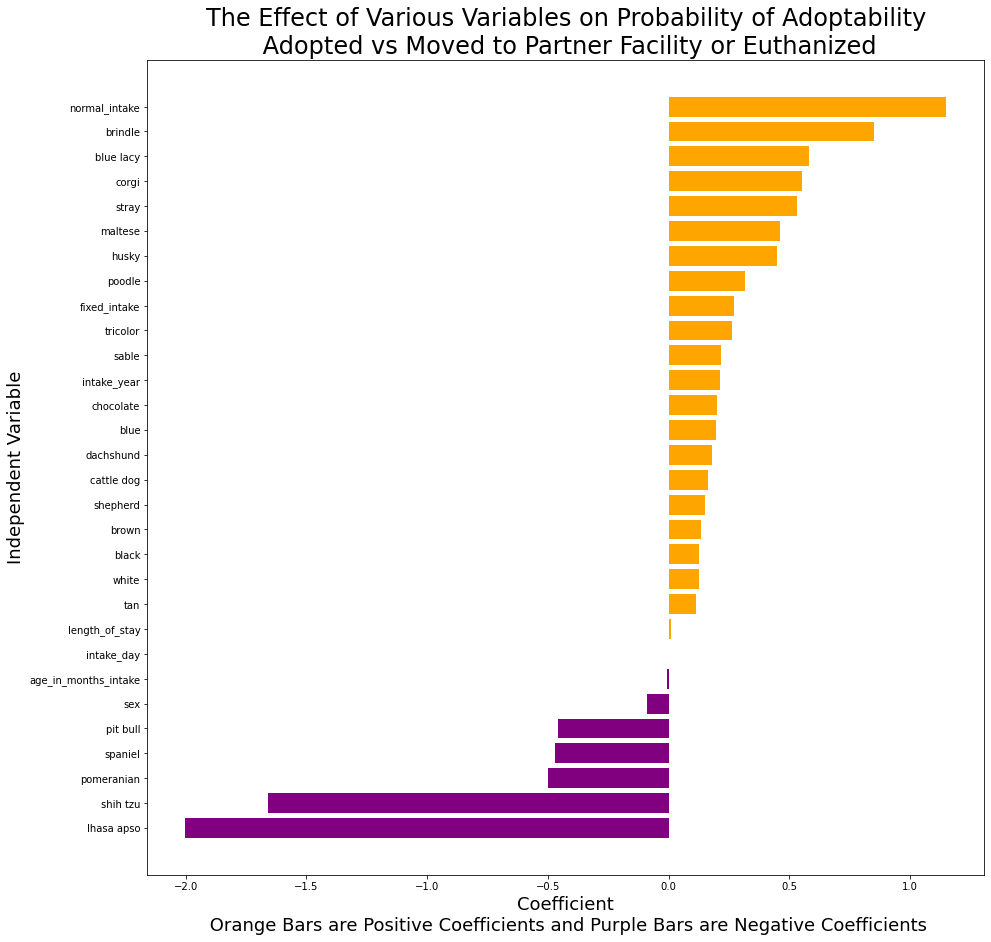

In [183]:
#plot the coefficients to visualize which have an inpact on the model predictability
plt.figure(figsize=(15, 15))
plt.barh(new_adopted_coeff.index, new_adopted_coeff['Coefficient'], color = colors)
plt.title("The Effect of Various Variables on Probability of Adoptability\n Adopted vs Moved to Partner Facility or Euthanized", size=24)
plt.ylabel("Independent Variable", size=18)
plt.xlabel('Coefficient\n Orange Bars are Positive Coefficients and Purple Bars are Negative Coefficients', size=18)
plt.savefig('adopt_partner_coeff.png')
plt.show()

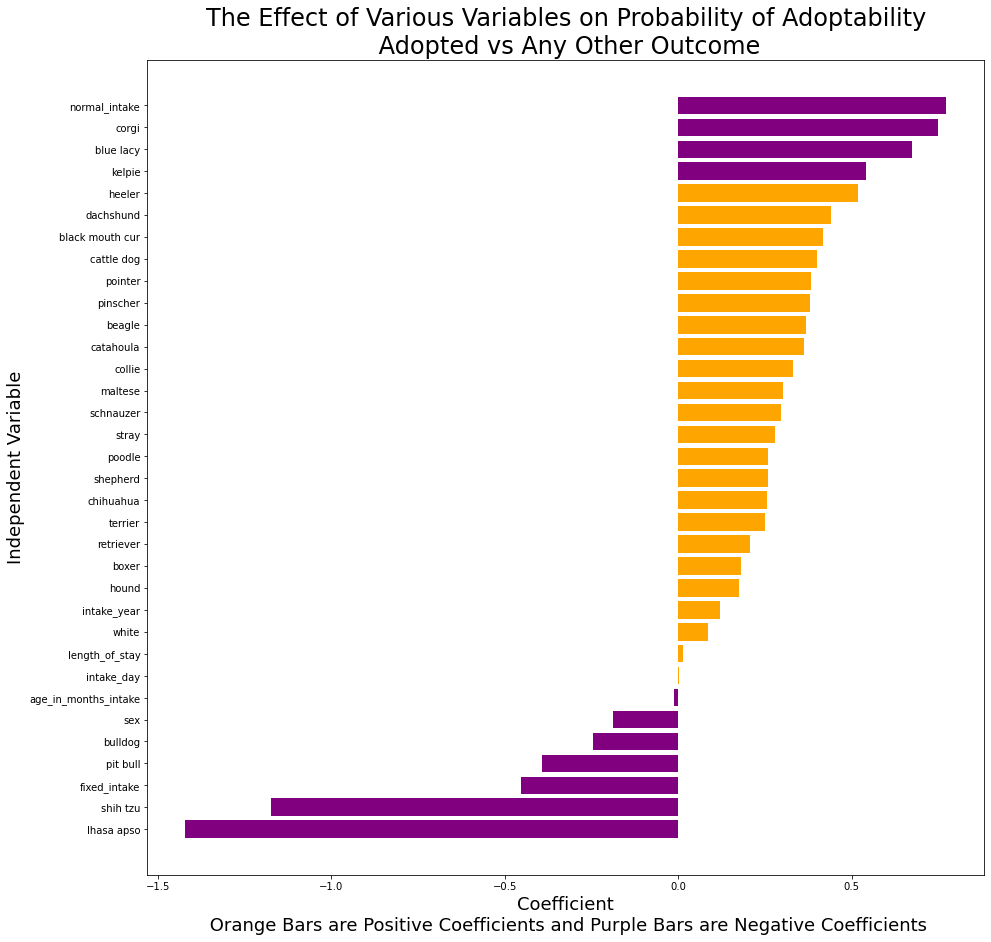

In [184]:
#plot the coefficients to visualize which have an inpact on the model predictability
plt.figure(figsize=(15, 15))
plt.barh(adopted_vs_all_coeff.index, adopted_vs_all_coeff['Coefficient'], color = colors)
plt.title("The Effect of Various Variables on Probability of Adoptability\n Adopted vs Any Other Outcome", size=24)
plt.ylabel("Independent Variable", size=18)
plt.xlabel('Coefficient\n Orange Bars are Positive Coefficients and Purple Bars are Negative Coefficients', size=18)
plt.savefig('adopt_all_coeff.png')
plt.show()

In [185]:
#interpet the coefficient with the highest coefficient
max_coeff = new_adopted_coeff['Coefficient'][-1:]
max_odds_ratio = np.exp(max_coeff)

In [186]:
#interpet the coefficient with the lowest coefficient
min_coeff = new_adopted_coeff['Coefficient'][0]
min_odds_ratio = np.exp(min_coeff)

Comparing these coefficients with the coefficients from the previous target split, there is a lot of commonality. Many of the positive coefficients are the same independent variables and have similar coefficient quantities. Normal intake is still the best predictor of adoptability for this model, but dogs with a brindle coat color are more predictive of adoption outcome in this second model while corgi (breed) dogs were more likely to be adopted in the first model. The variables that are contributing to a dog not being adopted are almost all the same except cocker spaniels (breed) and pomeranian (breed) dogs are less likely to be adopted in this model as compared to the previous model. 


## Model Eval
<a class="anchor" id="neweval"></a>

In [187]:
# getting probabiistic and binary predictions
model_predictions_prob = mylogreg_adopt_resultsV.predict(X_withconstant)
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)

In [188]:
# How many did we predict right?
(model_predictions_binary == new_adopt_dfV['adopted']).sum()

14405

In [189]:
# How many data points to we have?
len(new_adopt_dfV['adopted'])

21462

In [190]:
print("The classification accuracy is:", round((14405/21462)*100, 1) , "%")
print("The base level prediction is:", round(new_adopt_dfV['adopted'].sum()/len(new_adopt_dfV['adopted'])*100, 1), "%")
print(f"That is a {round(((14405/21462) - (new_adopt_dfV['adopted'].sum()/len(new_adopt_dfV['adopted'])))*100,2)}% increase from base level.")

The classification accuracy is: 67.1 %
The base level prediction is: 61.6 %
That is a 5.5% increase from base level.


This increase on the base model is still significant and can be used to save time and resources at an animal shelter. It is unfortunate that using a more objective split reduces the predictive power of the model significantly (the previous model had a 22% increase from the base model). It is even more curious that the independent variables that impact these two models are very similar, but their predictive power is significantly different. 

# Comparing the Different Target Splits
<a class="anchor" id="compare"></a>

Considering the pros and cons of these two models, I will move forward with modeling using the more objective target split of dogs that were adopted versus dogs that were transfered or euthanized. This is for two reasons, the split build from this target variable split is lower and thus have the greatest room for improvement using advanced modeling techniques and this dataset is more likely descriptive of dogs that are truly likely to be adopted and not likely to be adopted. Remember: this dataset dropped a lot of dogs that were marked as "returned to owner" meaning they are likely adoptable (given they have someone who adopted them earlier in their life), but they were categorized into the not adoptable class (0) because they were not labeled as adoptable. In the next notebook I will use sklearn to test out a few more models that slightly more advanced than the linear regression model the Statmodels package has to offer. 